In [1214]:
import pandas as pd
import sweetviz as sv
import missingno as msno

# Lecture des csv



## Customers


In [1215]:
df_customer = pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_customers_dataset.csv')

In [1216]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<AxesSubplot:>

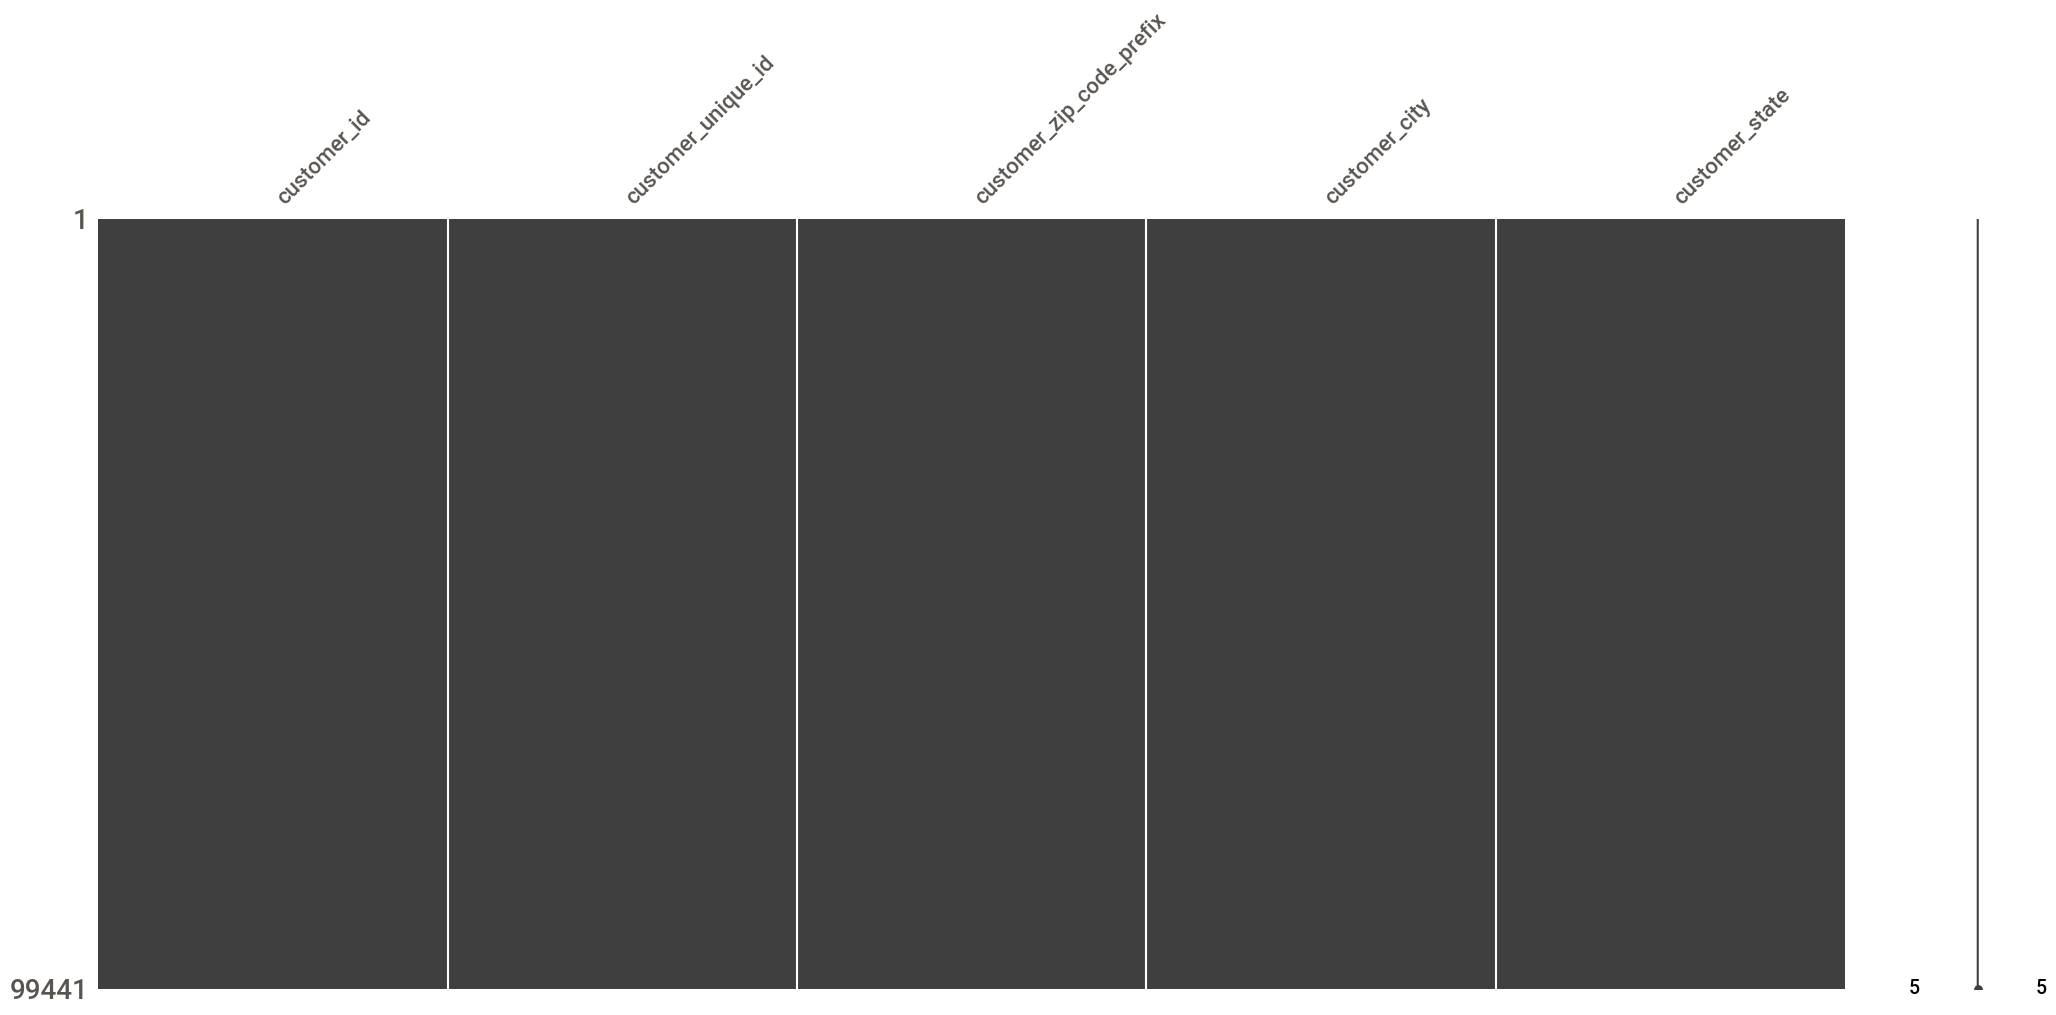

In [1217]:
msno.matrix(df_customer)

In [1218]:
columns_to_drop = [ "customer_city", "customer_state"]
df_customer = df_customer.drop(columns = columns_to_drop)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056


In [1219]:
missing_values_count = df_customer.isnull().sum()
missing_values_count

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
dtype: int64

In [1220]:
df_customer.shape

(99441, 3)

In [1221]:
df_customer["customer_id"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Name: customer_id, Length: 99441, dtype: bool

In [1222]:
report = sv.analyze(df_customer)
report.show_html('report_customer.html')

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: customer_id                         |██▌       | [ 25%]   00:00 -> (00:00 left)/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: custome

Report report_customer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Geolocation

In [1223]:
df_geolocation = pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_geolocation_dataset.csv')

In [1224]:
df_geolocation = df_geolocation.drop(columns="geolocation_state")

In [1225]:
df_geolocation.shape

(1000163, 4)

In [1226]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1037,-23.545621,-46.639292,sao paulo
1,1046,-23.546081,-46.644820,sao paulo
2,1046,-23.546129,-46.642951,sao paulo
3,1041,-23.544392,-46.639499,sao paulo
4,1035,-23.541578,-46.641607,sao paulo


In [1227]:
df_geolocation = df_geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean', 'geolocation_city': 'first'})
df_geolocation = df_geolocation.reset_index()
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1001,-23.550190,-46.634024,sao paulo
1,1002,-23.548146,-46.634979,sao paulo
2,1003,-23.548994,-46.635731,sao paulo
3,1004,-23.549799,-46.634757,sao paulo
4,1005,-23.549456,-46.636733,sao paulo
...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua
19011,99965,-28.183372,-52.039850,agua santa
19012,99970,-28.343766,-51.874689,ciriaco
19013,99980,-28.389129,-51.843836,david canabarro


<AxesSubplot:>

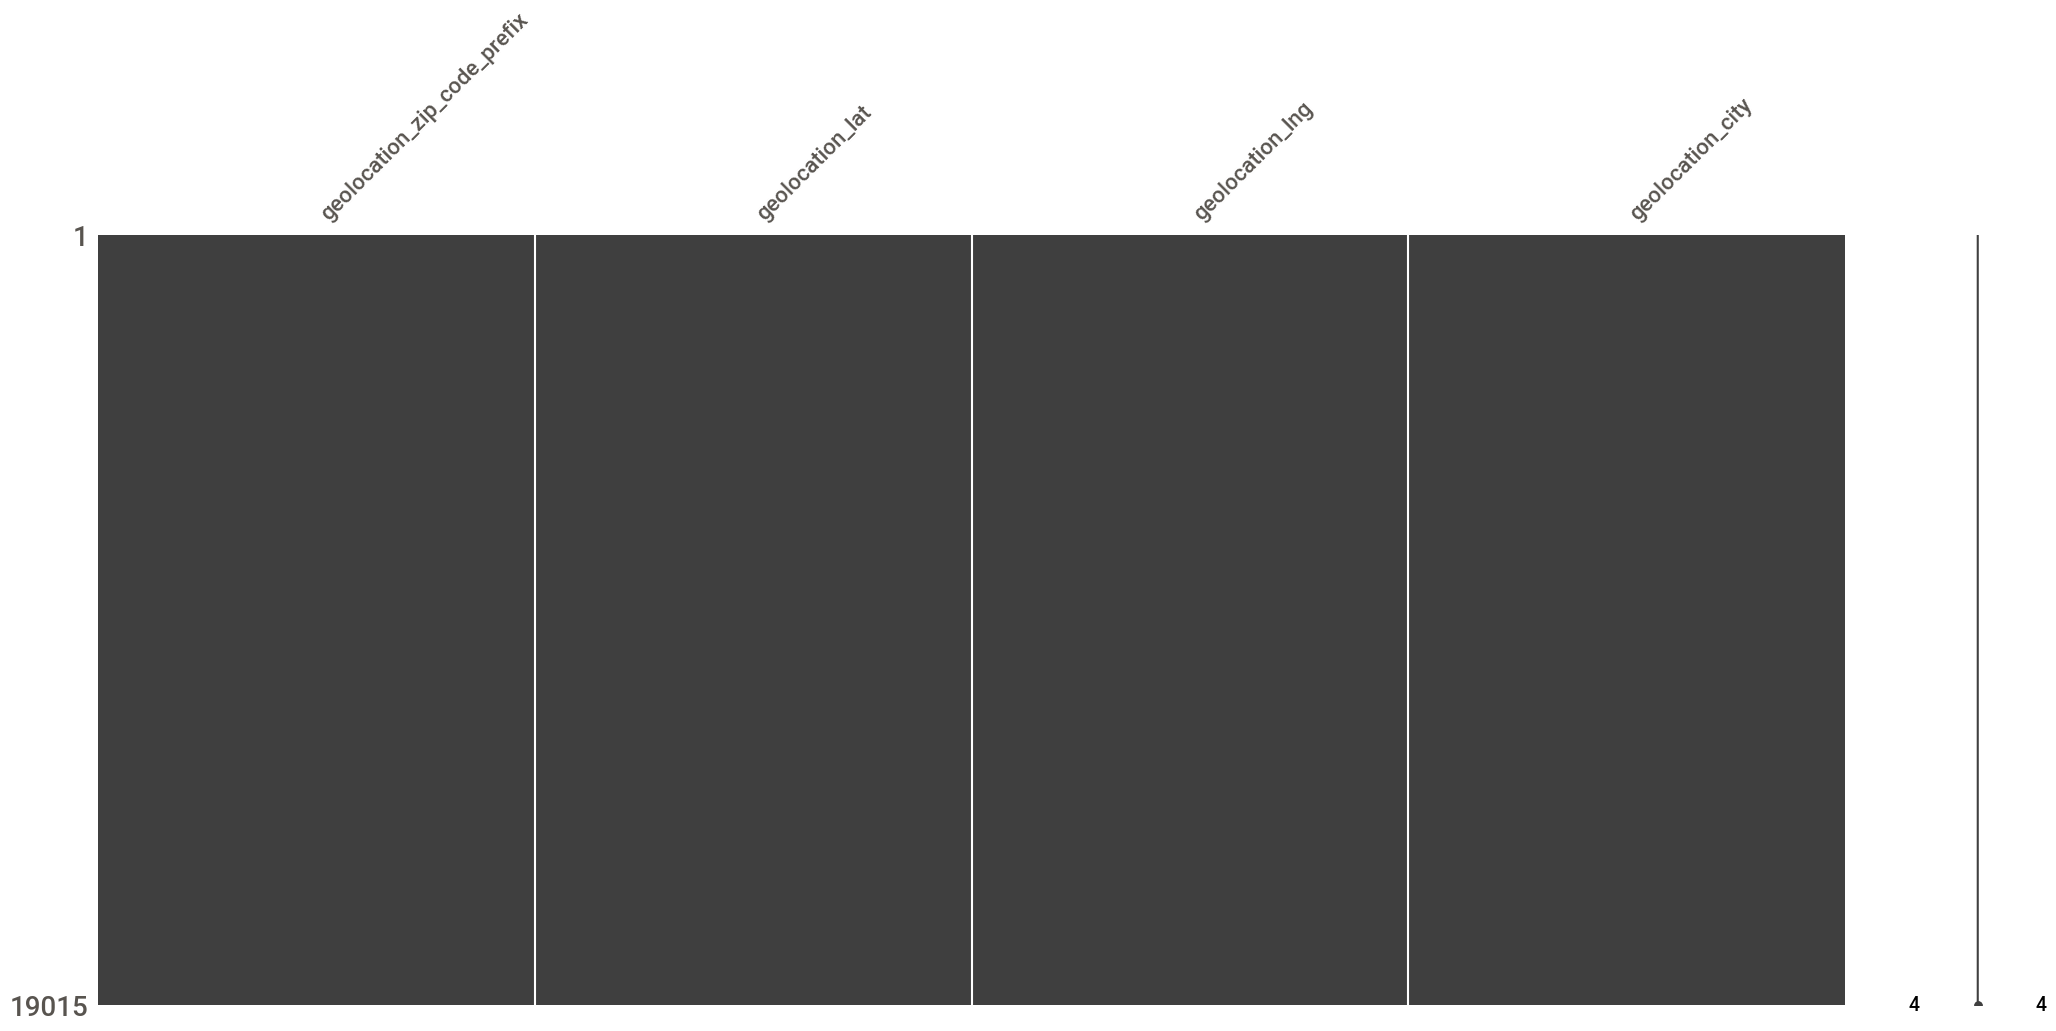

In [1228]:
msno.matrix(df_geolocation)


## merge entre customer et geolocation

In [1229]:
df_merged = pd.merge(df_customer, df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
# customers_dataset_merged_with_geo = df_customer.merge(geolocation_dataset_without_duplicates_in_zip[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
#                                      left_on='customer_zip_code_prefix', 
#                                      right_on='geolocation_zip_code_prefix', 
#                                      how='left')


In [1230]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   geolocation_zip_code_prefix  99163 non-null  float64
 4   geolocation_lat              99163 non-null  float64
 5   geolocation_lng              99163 non-null  float64
 6   geolocation_city             99163 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.1+ MB


In [1231]:
df_merged.shape

(99441, 7)

In [1232]:
missing_values_count = df_merged.isnull().sum()
missing_values_count

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
dtype: int64

In [1233]:
df_merged = df_merged.dropna()

In [1234]:
# import folium


# # Créer une carte en utilisant les coordonnées comme centre de la carte
# map = folium.Map(location=[df_merged["geolocation_lat"].mean(), df_merged["geolocation_lng"].mean()], zoom_start=13)

# # Pour chaque ligne dans le DataFrame, ajouter un marqueur à la carte
# for index, row in df_merged.iterrows():
#     folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]], popup="Emplacement {}".format(index)).add_to(map)

# # Afficher la carte
# map.save("map.html")


In [1235]:
import json 

with open('brazil_geo.json') as f:
   geo= json.load(f)

In [1236]:
# import folium
# from folium.plugins import MarkerCluster


# def add_marker(row):
#     folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]], popup="Emplacement {}".format(row.name)).add_to(marker_cluster)

# # Créer une carte en utilisant les coordonnées comme centre de la carte
# map = folium.Map(location=[df_merged["geolocation_lat"].mean(), df_merged["geolocation_lng"].mean()], zoom_start=13)

# # Créer un cluster de marqueurs
# marker_cluster = MarkerCluster().add_to(map)
# folium.TileLayer('stamentoner').add_to(map) # Sets Tile Theme to (Dark Theme)
# folium.Choropleth(geo_data = geo).add_to(map)

# # Ajouter des marqueurs au cluster en utilisant apply
# df_merged.apply(add_marker, axis=1)

# # Afficher la carte
# map.save("map.html")


In [1237]:
# # Stamen Terrain
# map = folium.Map(location=[23.54562128115268, -46.63929204800168 ], tiles="Stamen Terrain", zoom_start=9)
# map

## order items

In [1238]:
df_order_items= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_items_dataset.csv')

In [1239]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1240]:
df_order_items["order_item_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [1241]:
df_order_items = df_order_items.drop(columns = "shipping_limit_date")
df_order_items

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


<AxesSubplot:>

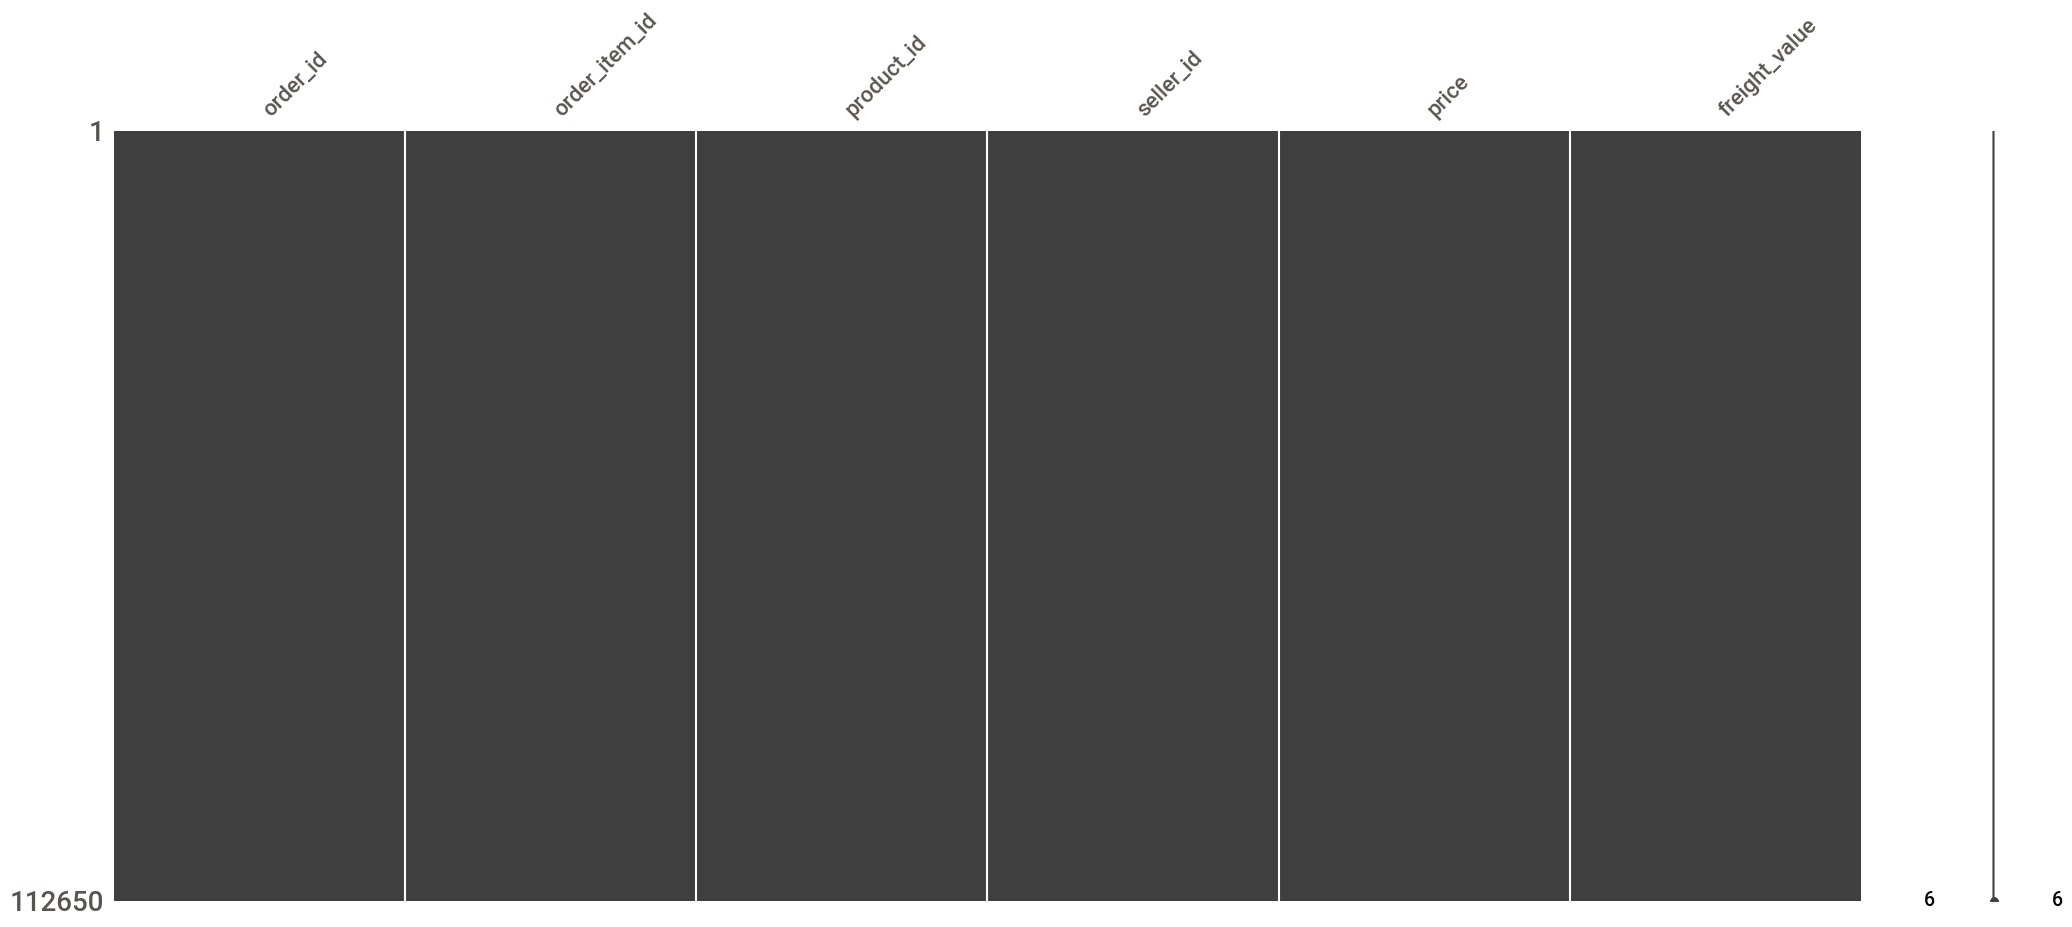

In [1242]:
msno.matrix(df_order_items)


In [1243]:
report = sv.analyze(df_order_items)
report.show_html('report_order_items.html')

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: order_id                            |█▍        | [ 14%]   00:00 -> (00:00 left)/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: order_i

Report report_order_items.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## order payements

In [1244]:
df_order_payements= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_payments_dataset.csv')

In [1245]:
df_order_payements.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1246]:
df_order_payements = df_order_payements.drop(columns="payment_value")


In [1247]:
df_order_payements.head()

,order_id,payment_sequential,payment_type,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2


In [1248]:
report = sv.analyze(df_order_payements)
report.show_html('report_order_payements.html')

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: order_id                            |██        | [ 20%]   00:00 -> (00:00 left)/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: payment

Report report_order_payements.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

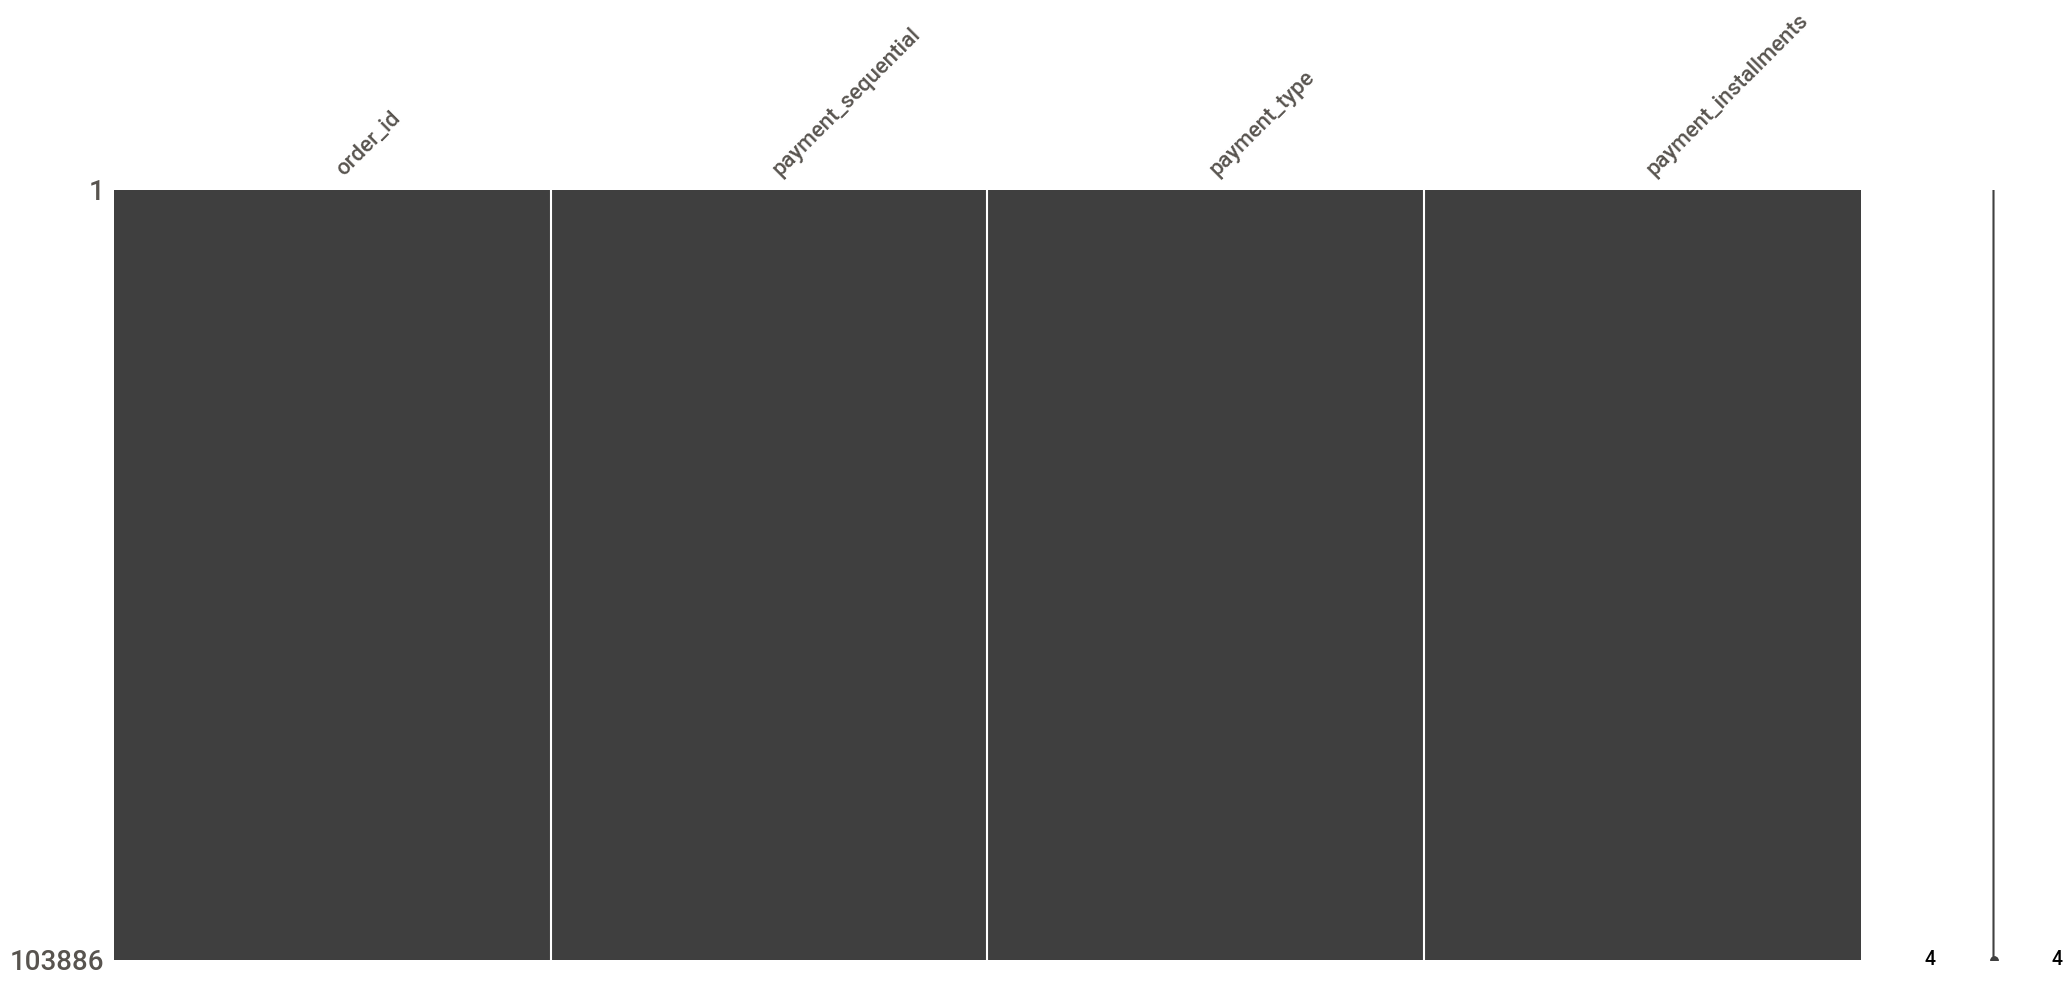

In [1249]:
msno.matrix(df_order_payements)


## order reviews 

In [1250]:
df_order_reviews= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<AxesSubplot:>

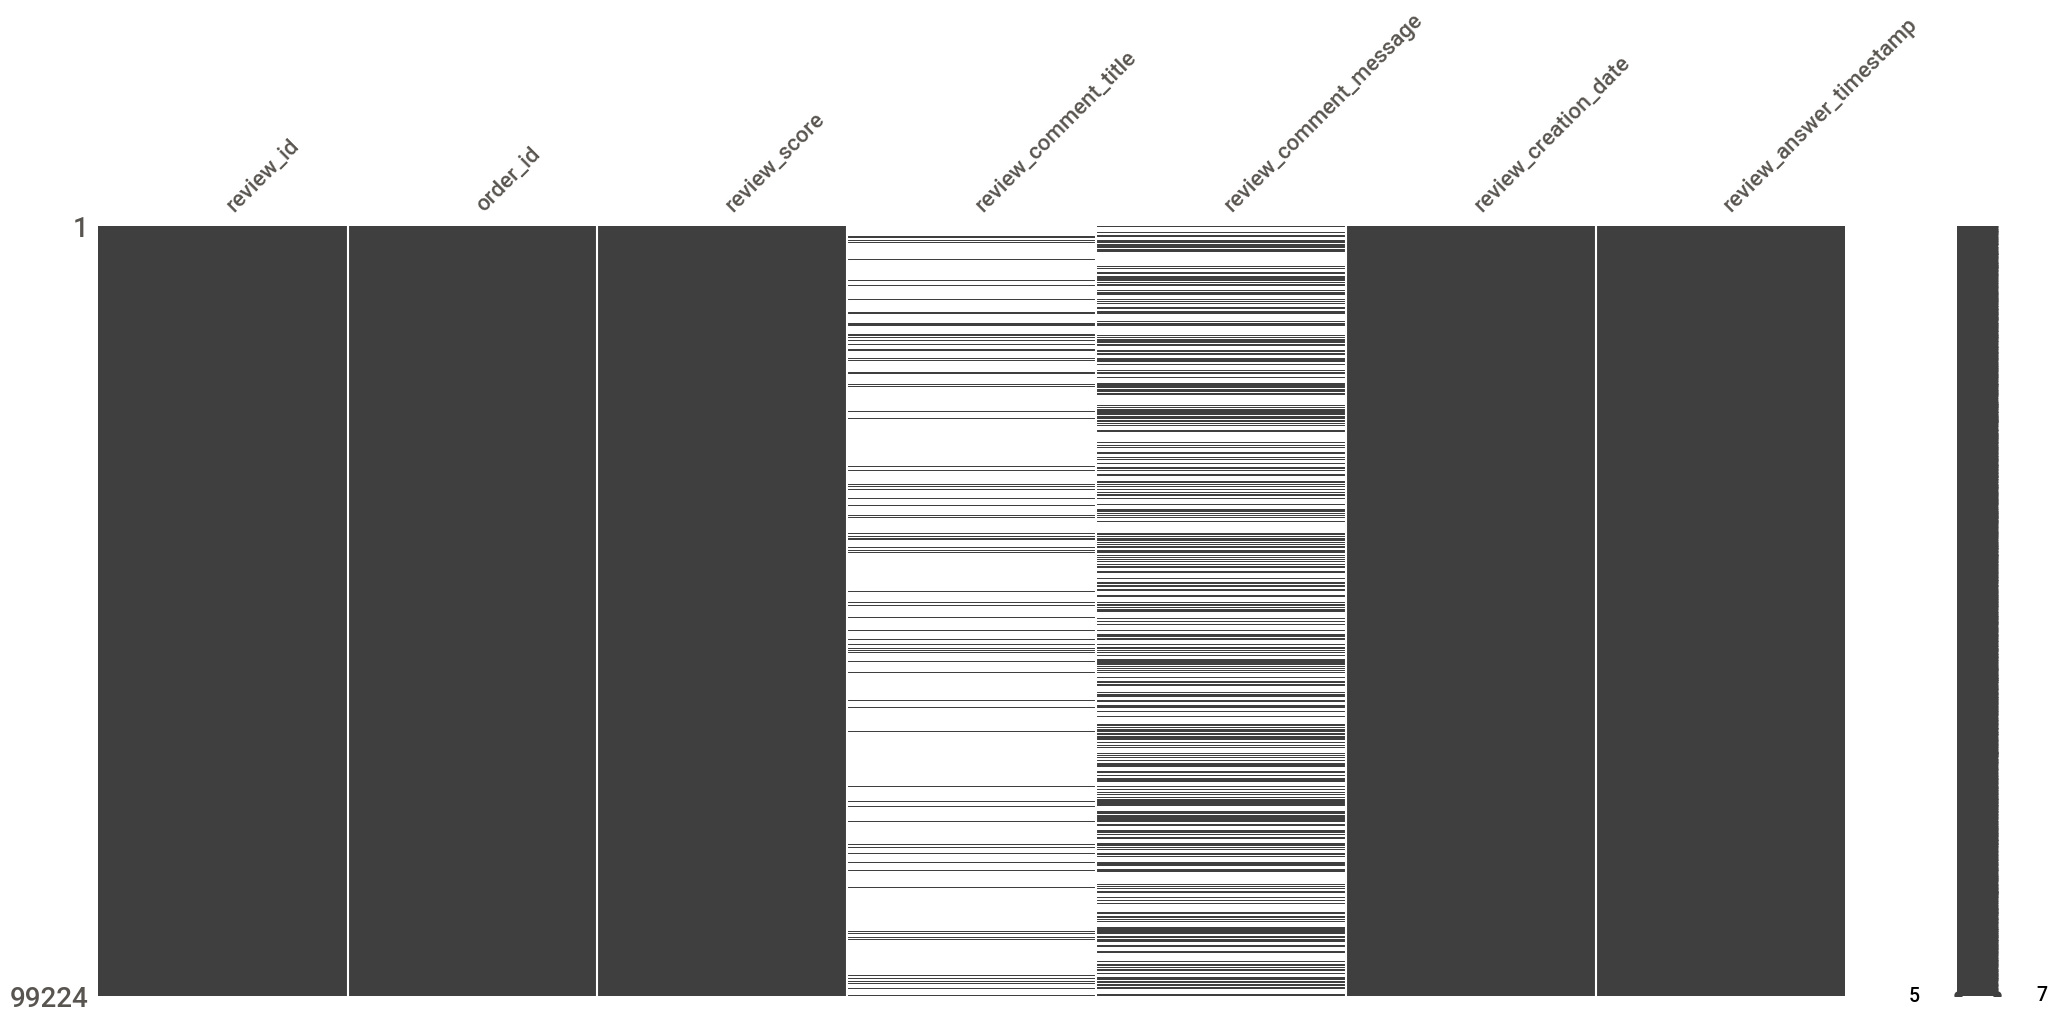

In [1251]:
msno.matrix(df_order_reviews)

In [1252]:
columstodrop = ["review_comment_title","review_comment_message", "review_creation_date"]
df_order_reviews.drop(columns=columstodrop,  inplace=True)


In [1253]:
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"]).dt.strftime('%Y-%m-%d')

In [1254]:
df_order_reviews.head()

,review_id,order_id,review_score,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-02


## orders 

In [1255]:
df_order= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_orders_dataset.csv')
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1256]:
columns_to_drop= ['order_approved_at',"order_delivered_carrier_date"]
df_order = df_order.drop(columns= columns_to_drop)

In [1257]:
df_order.shape

(99441, 6)

<AxesSubplot:>

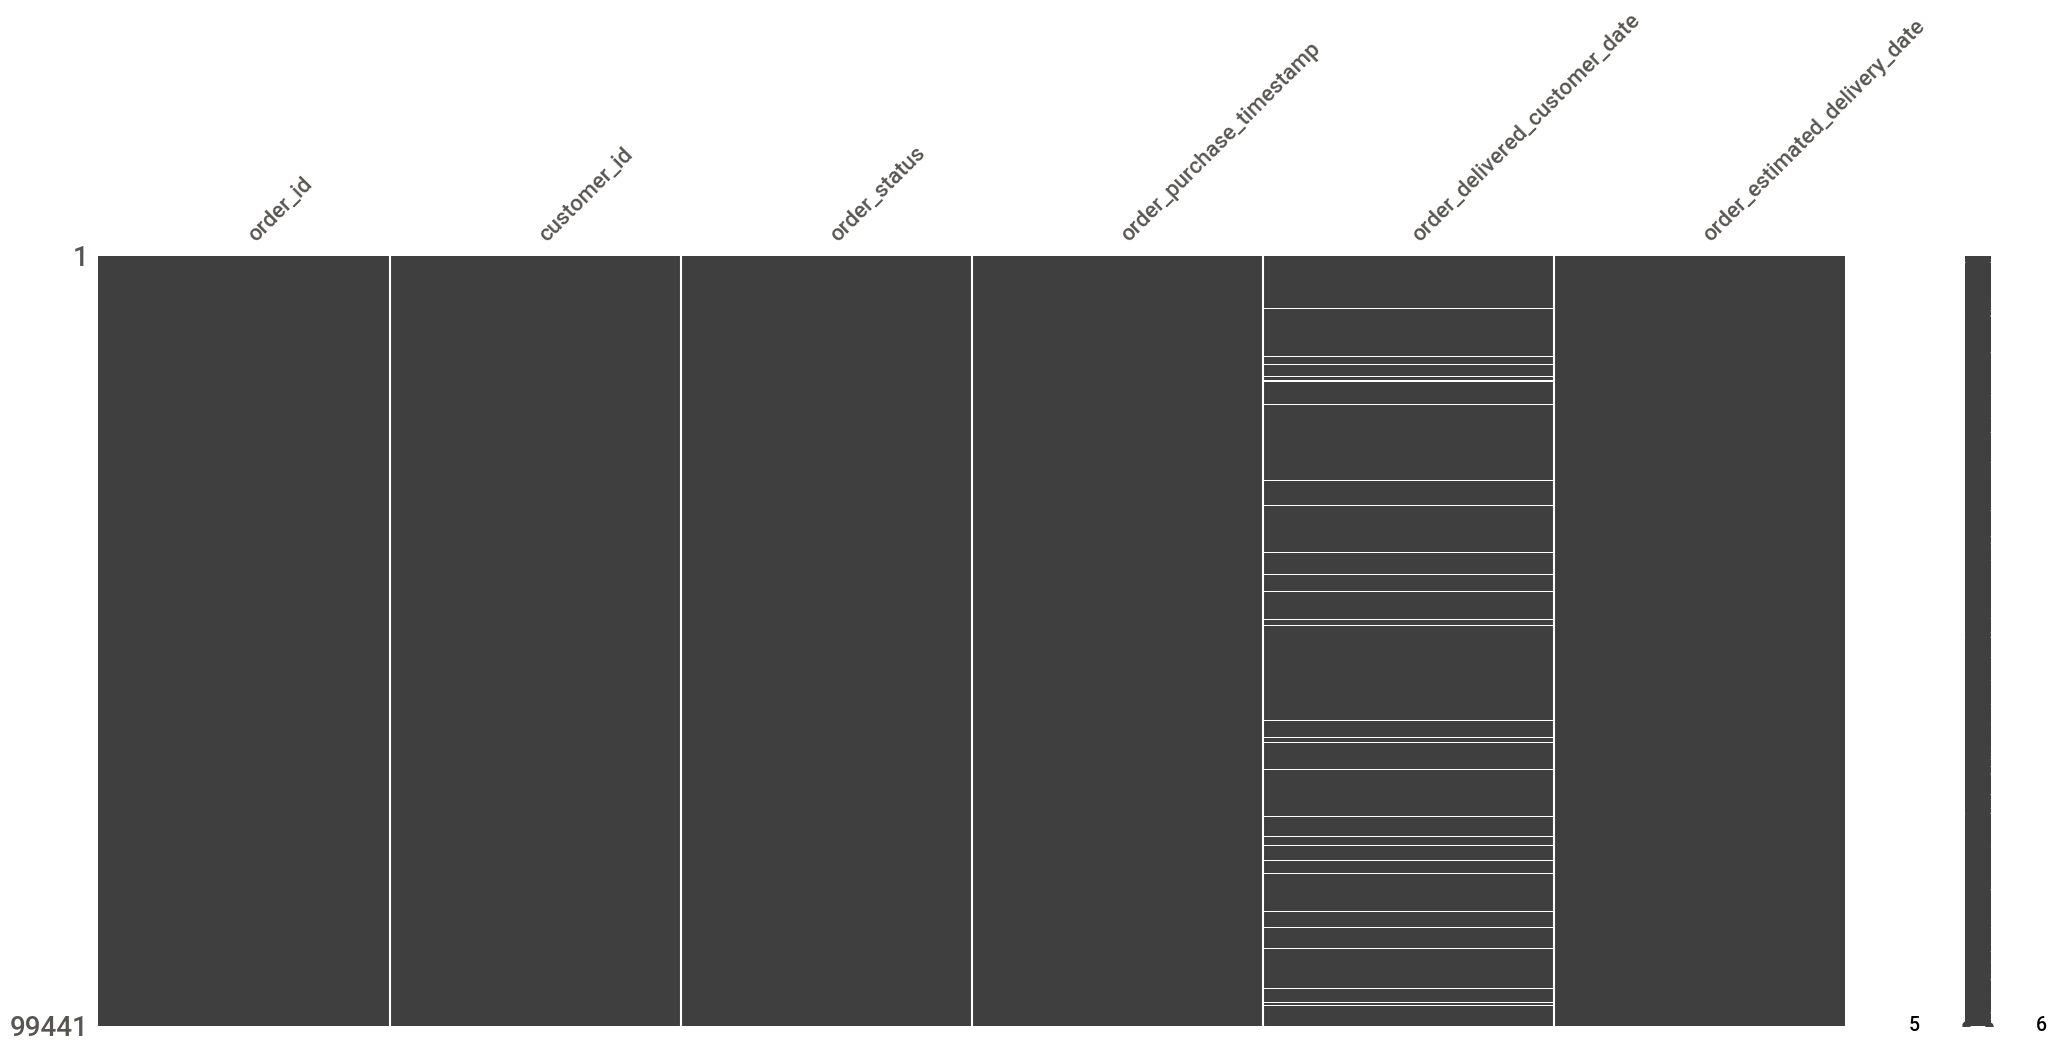

In [1258]:
msno.matrix(df_order)


In [1259]:
df_order["order_status"].unique

<bound method Series.unique of 0        delivered
1        delivered
2        delivered
3        delivered
4        delivered
           ...    
99436    delivered
99437    delivered
99438    delivered
99439    delivered
99440    delivered
Name: order_status, Length: 99441, dtype: object>

In [1260]:
missing_values_count = df_order.isnull().sum()
missing_values_count

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Products 

In [1261]:
df_order_products= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_products_dataset.csv')
df_order_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1262]:
df_order_products = df_order_products[["product_id","product_category_name",]]
df_order_products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


<AxesSubplot:>

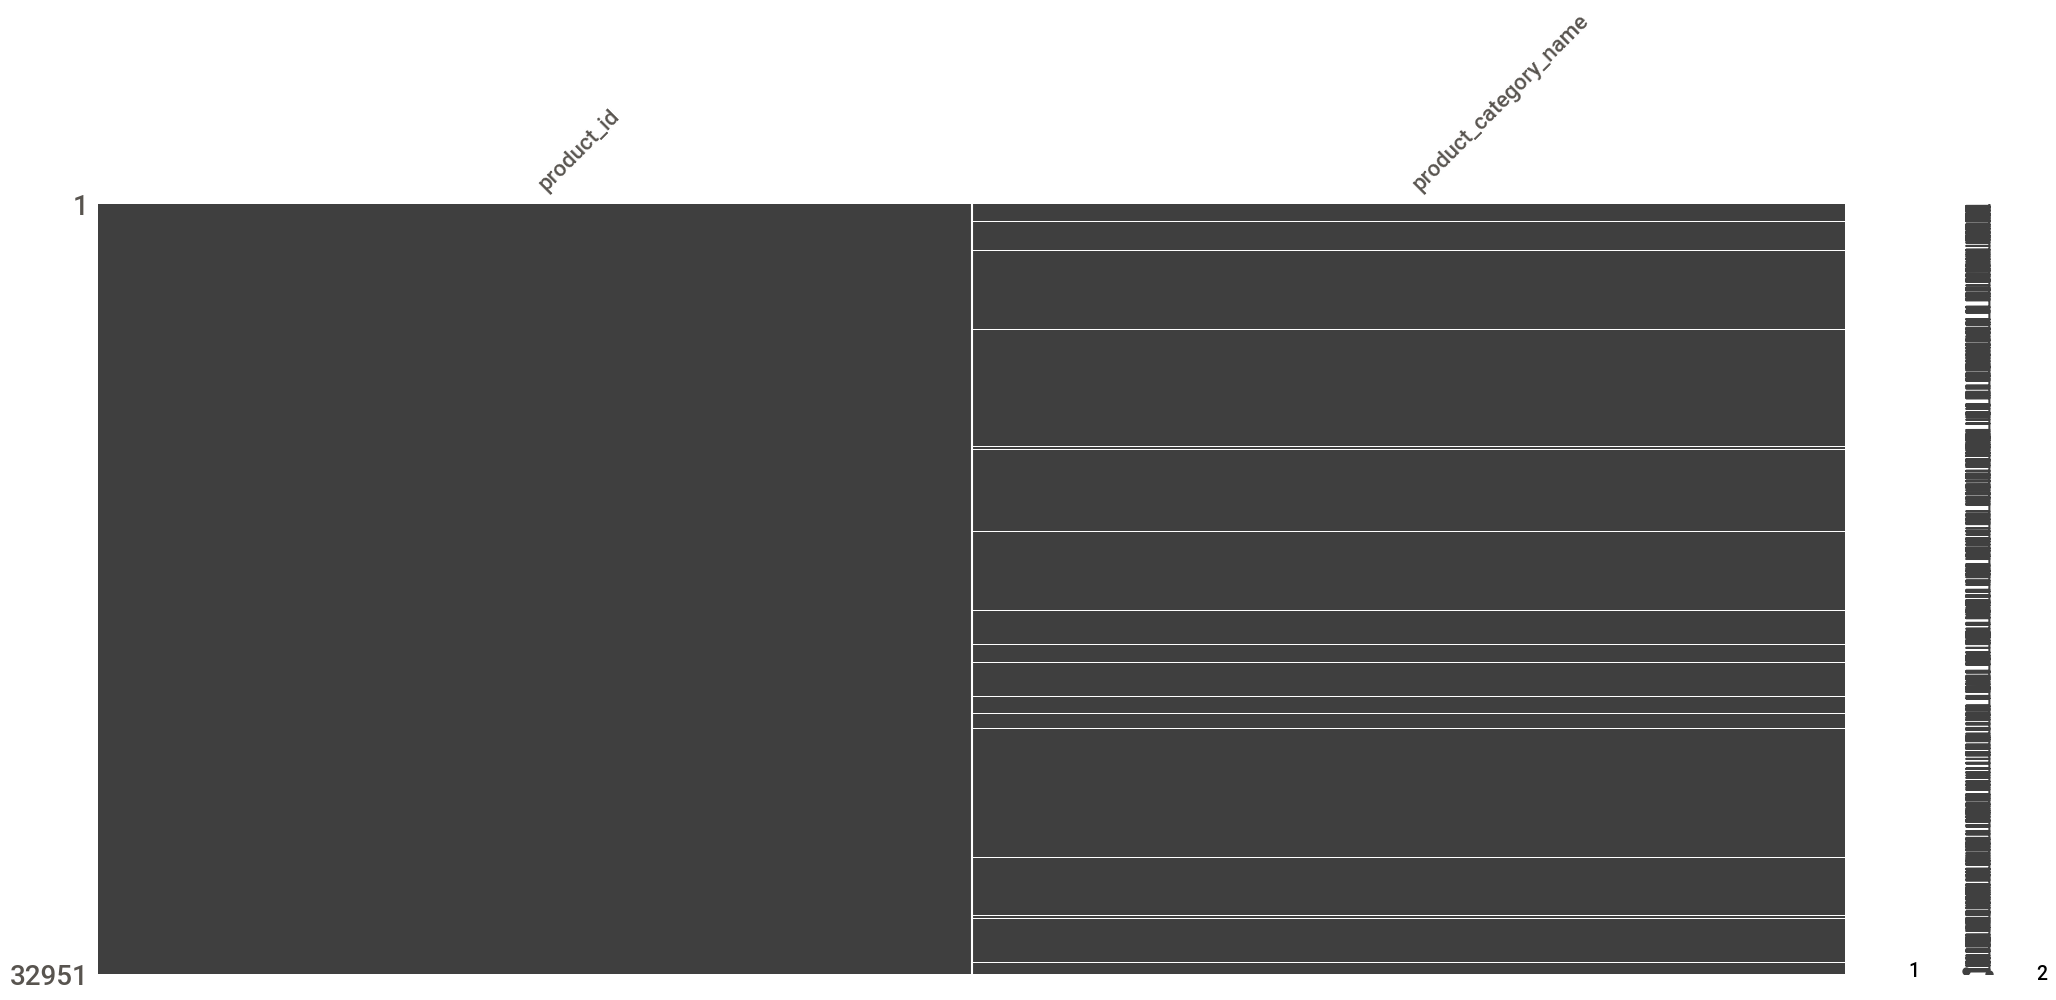

In [1263]:
msno.matrix(df_order_products)

In [1264]:
missing_values_count = df_order_products.isnull().sum()
missing_values_count

product_id                 0
product_category_name    610
dtype: int64

## Sellers


In [1265]:
df_sellers= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_sellers_dataset.csv')

In [1266]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [1267]:
df_sellers.drop(columns=["seller_city","seller_state"])

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


<AxesSubplot:>

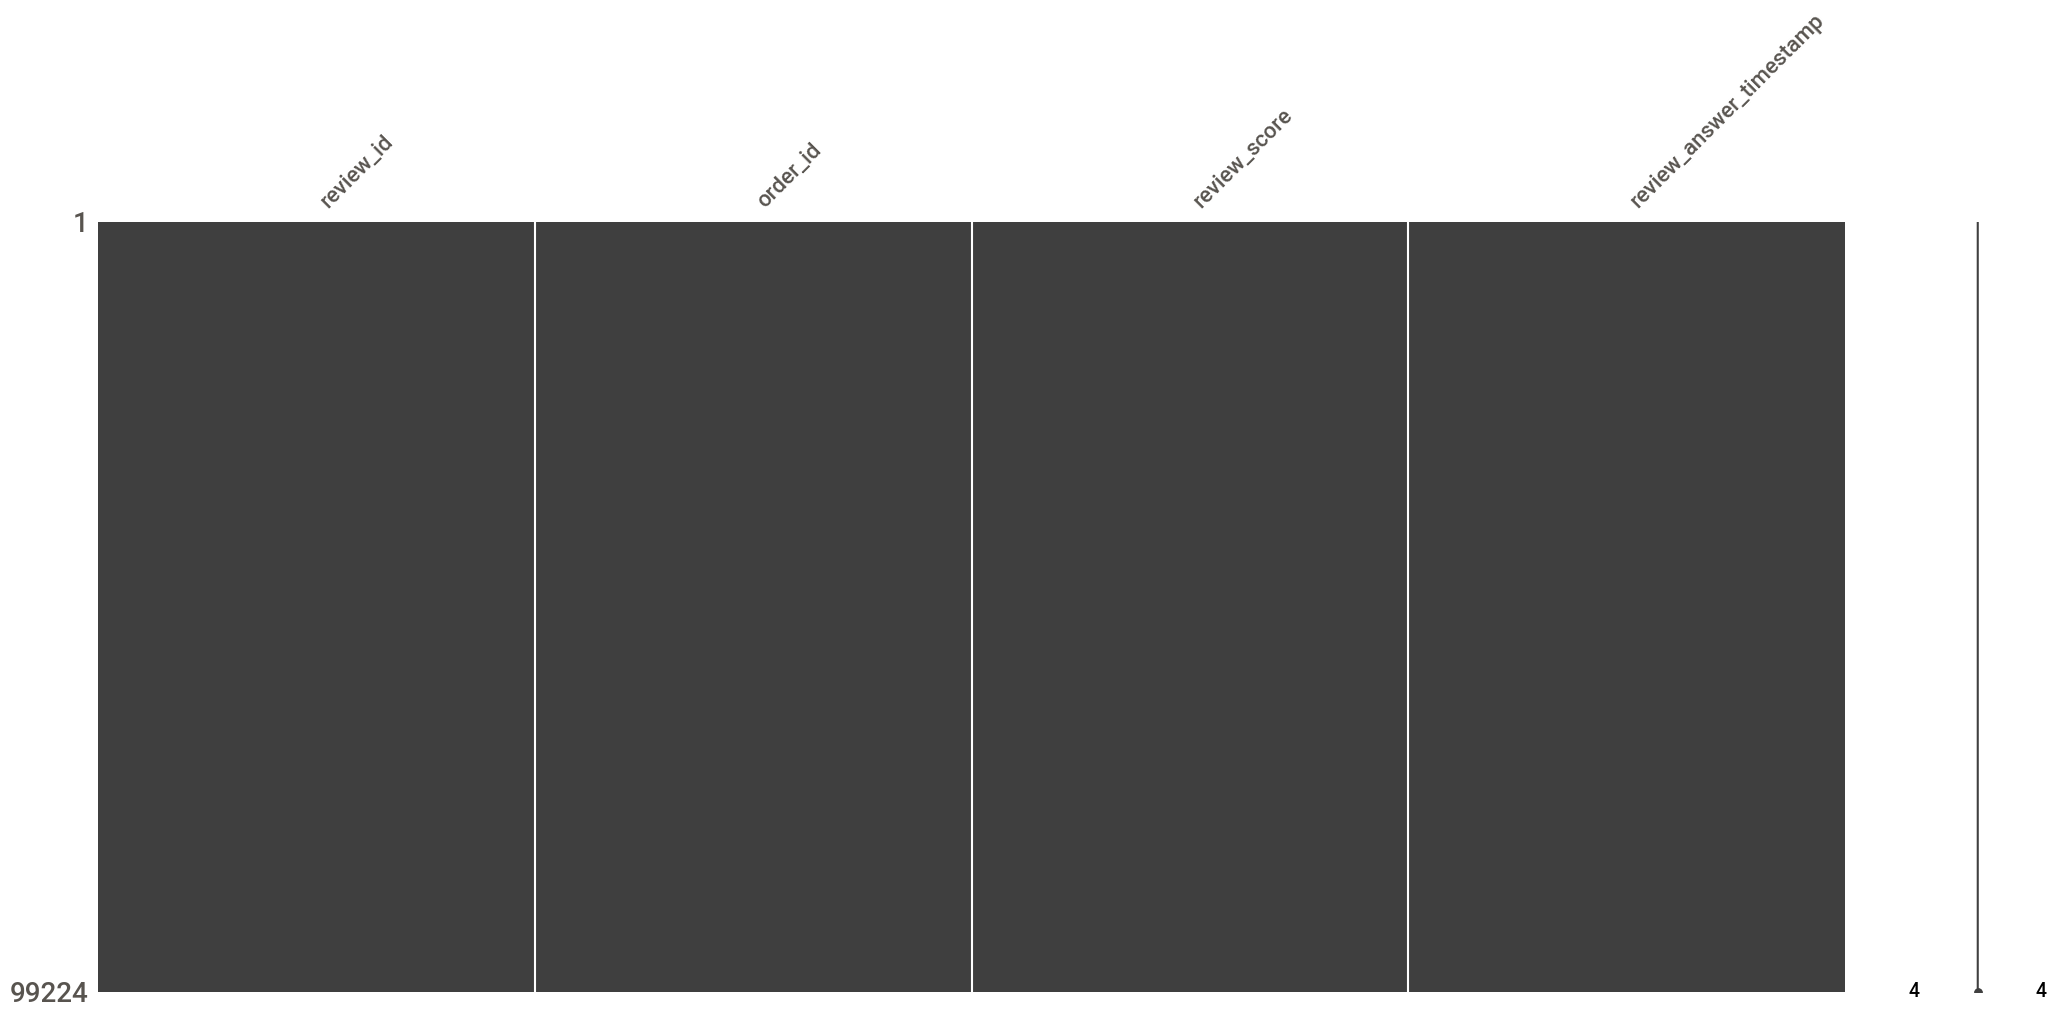

In [1268]:
msno.matrix(df_order_reviews)

## merge entre customer et seller

## Category name translation

In [1269]:
df_product_category_name_translation= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/product_category_name_translation.csv')

In [1270]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<AxesSubplot:>

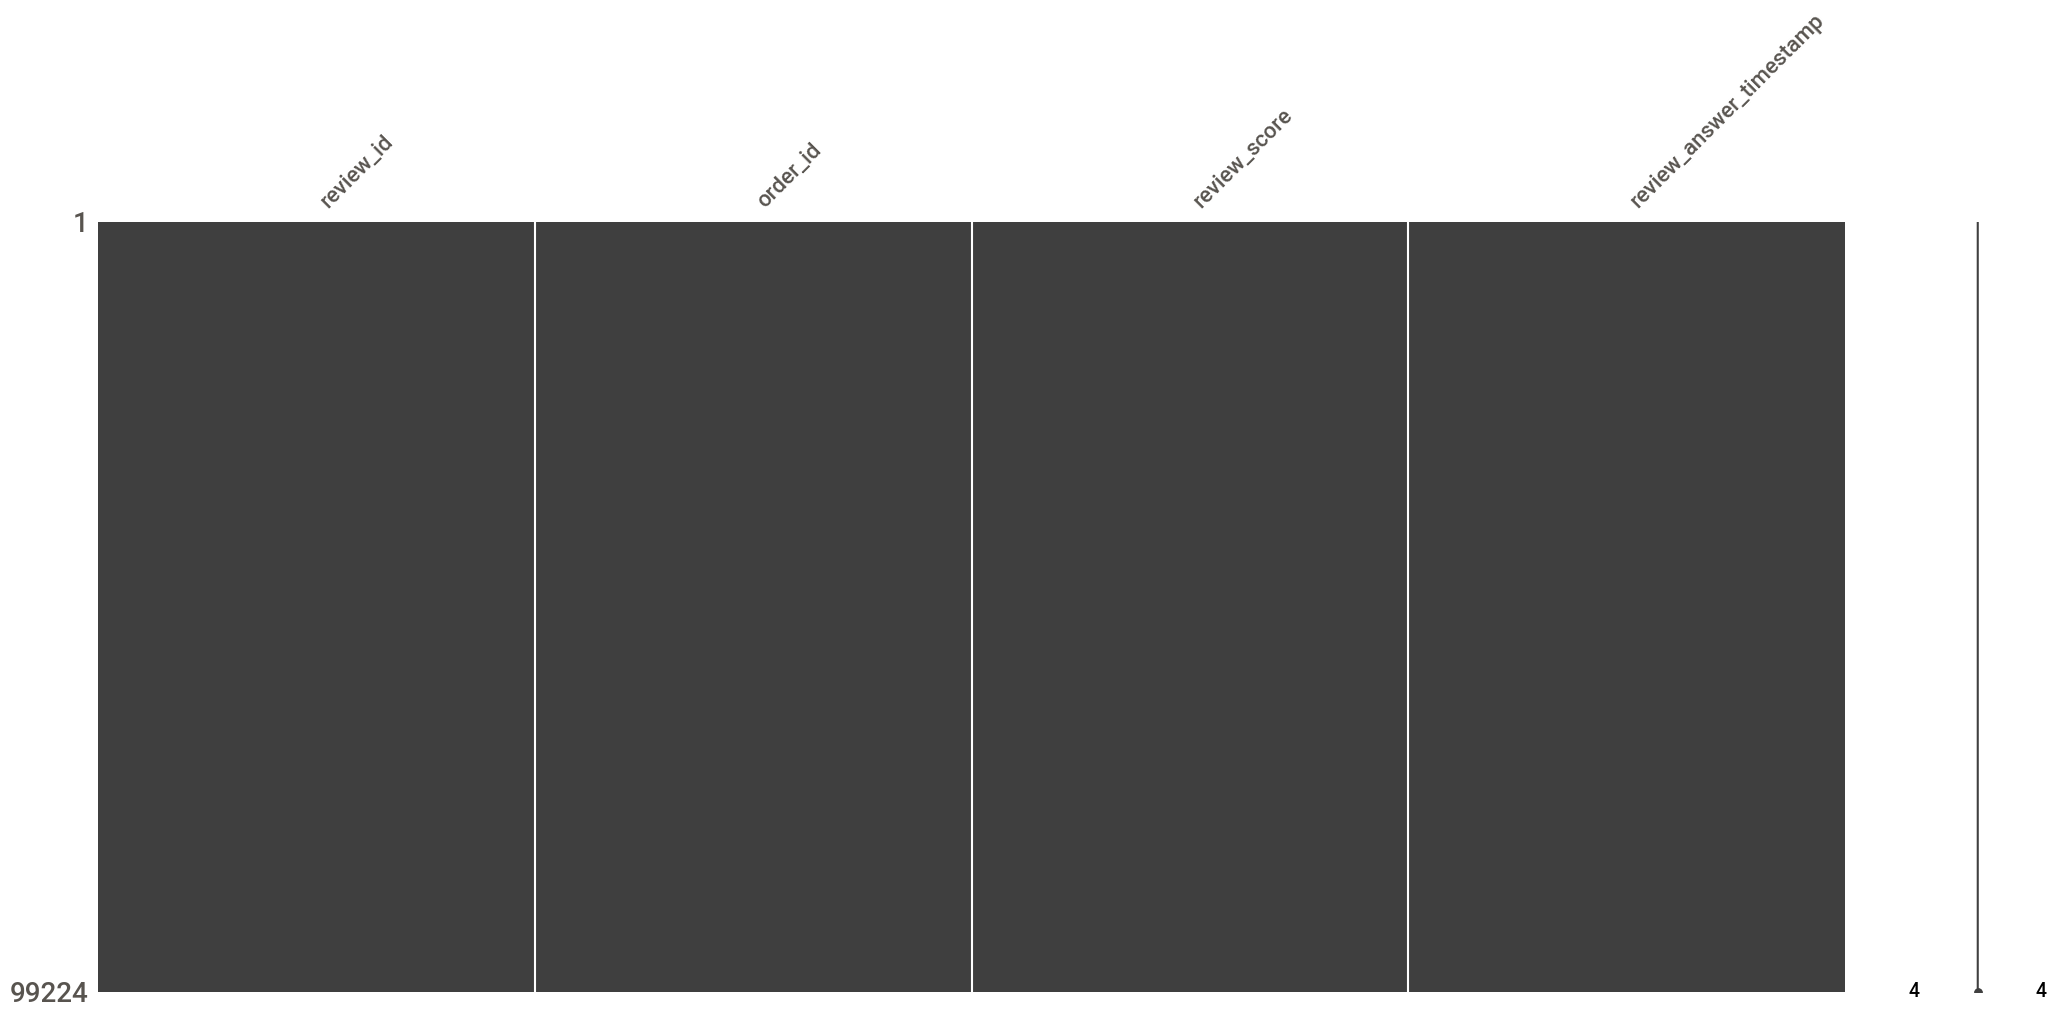

In [1271]:
msno.matrix(df_order_reviews)

## Remplacement des produuits par ctégories en anglais

In [1272]:
# Joindre les deux tableaux de données
df_order_products = pd.merge(df_order_products, df_product_category_name_translation, on='product_category_name')

# Remplacer les valeurs dans la colonne 'product_category_name'
df_order_products['product_category_name'] = df_order_products['product_category_name_english']

# Supprimer la colonne inutile
df_order_products.drop('product_category_name_english', axis=1, inplace=True)

print(df_order_products)

                             product_id              product_category_name
0      1e9e8ef04dbcff4541ed26657ea517e5                          perfumery
1      6a2fb4dd53d2cdb88e0432f1284a004c                          perfumery
2      0d009643171aee696f4733340bc2fdd0                          perfumery
3      b1eae565a61935e0011ee7682fef9dc9                          perfumery
4      8da90b37f0fb171b4877c124f965b1f6                          perfumery
...                                 ...                                ...
32323  13b25797ad1e6d6c7cd3cbeb35f8ee7a  furniture_mattress_and_upholstery
32324  dc36a7859b743d8610a2bbbaea26ece9  furniture_mattress_and_upholstery
32325  107fde0930956120d1e13dd1062fbb46  furniture_mattress_and_upholstery
32326  726b4e18f00255e2e63491bcba3f60b8  furniture_mattress_and_upholstery
32327  1dceebcc5f23c02ea23e16d5bedca000                  cds_dvds_musicals

[32328 rows x 2 columns]


# Merger les Dataframes entre eux

In [1273]:
df_merged_final = pd.merge(df_customer, df_order, left_on='customer_id', right_on='customer_id', how='left')

In [1274]:
df_merged_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00


In [1275]:
df_merged_final.shape

(99441, 8)

<AxesSubplot:>

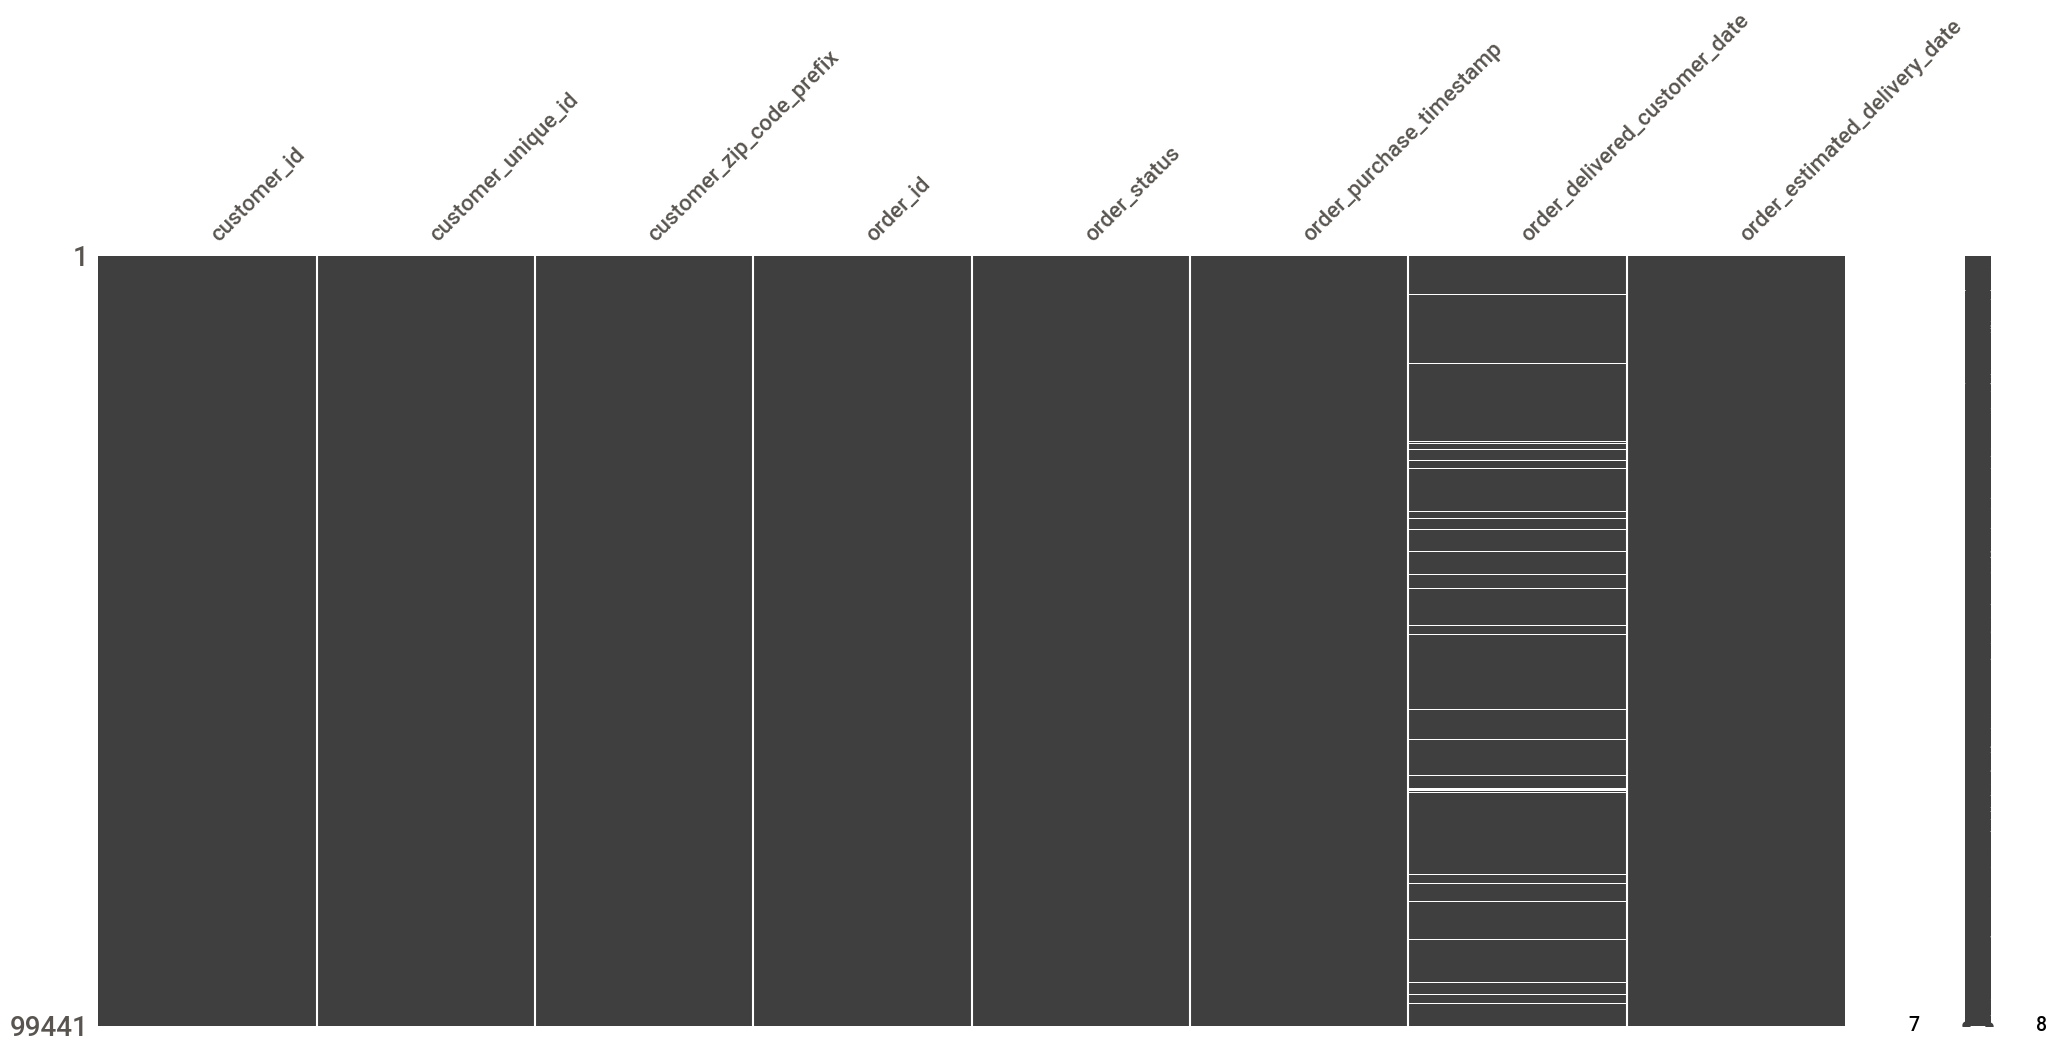

In [1276]:
msno.matrix(df_merged_final)

In [1277]:
df_merged_final = pd.merge(df_merged_final, df_order_payements, how='left', on='order_id')

In [1278]:
df_merged_final.shape

(103887, 11)

<AxesSubplot:>

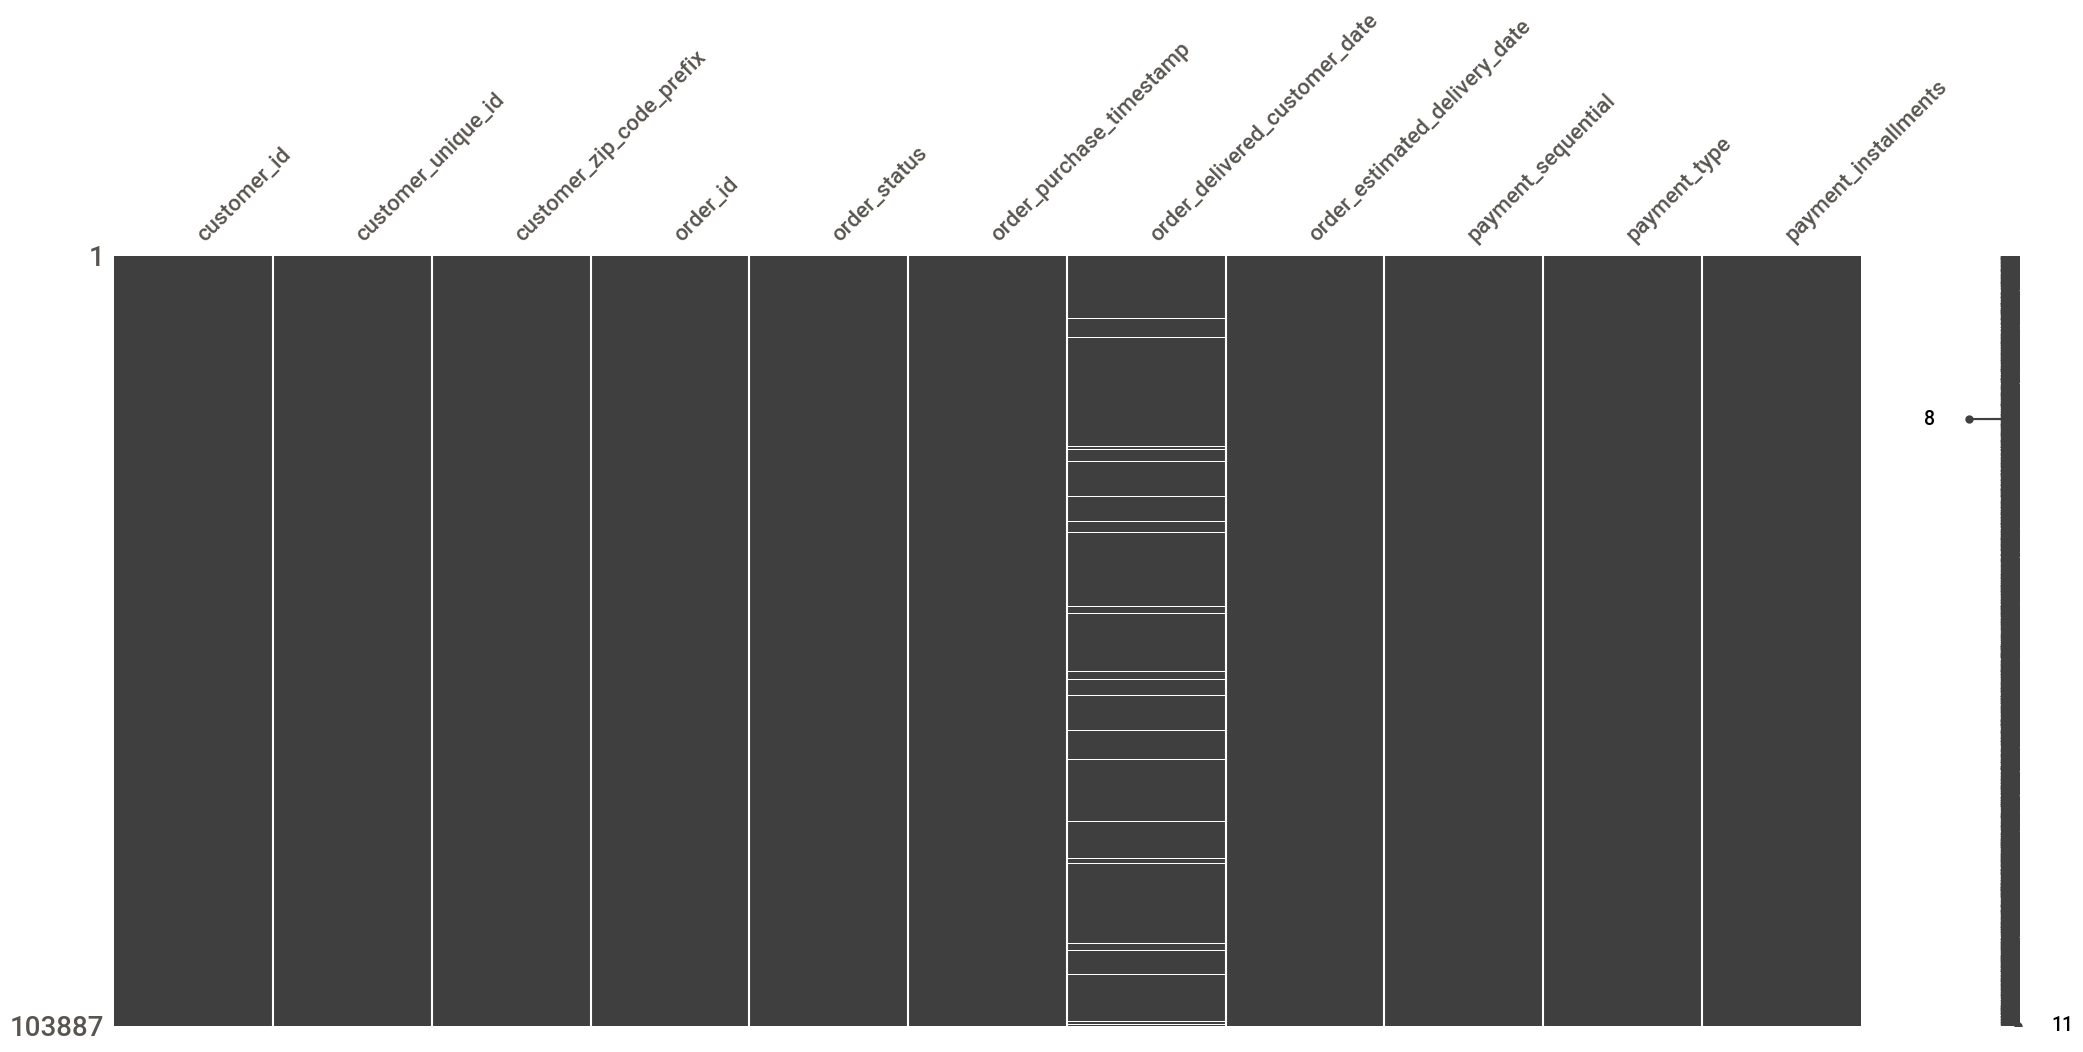

In [1279]:
msno.matrix(df_merged_final)

In [1280]:
df_merged_final = pd.merge(df_merged_final, df_order_items, left_on='order_id', right_on='order_id', how='left')

In [1281]:
df_merged_final.shape

(118434, 16)

<AxesSubplot:>

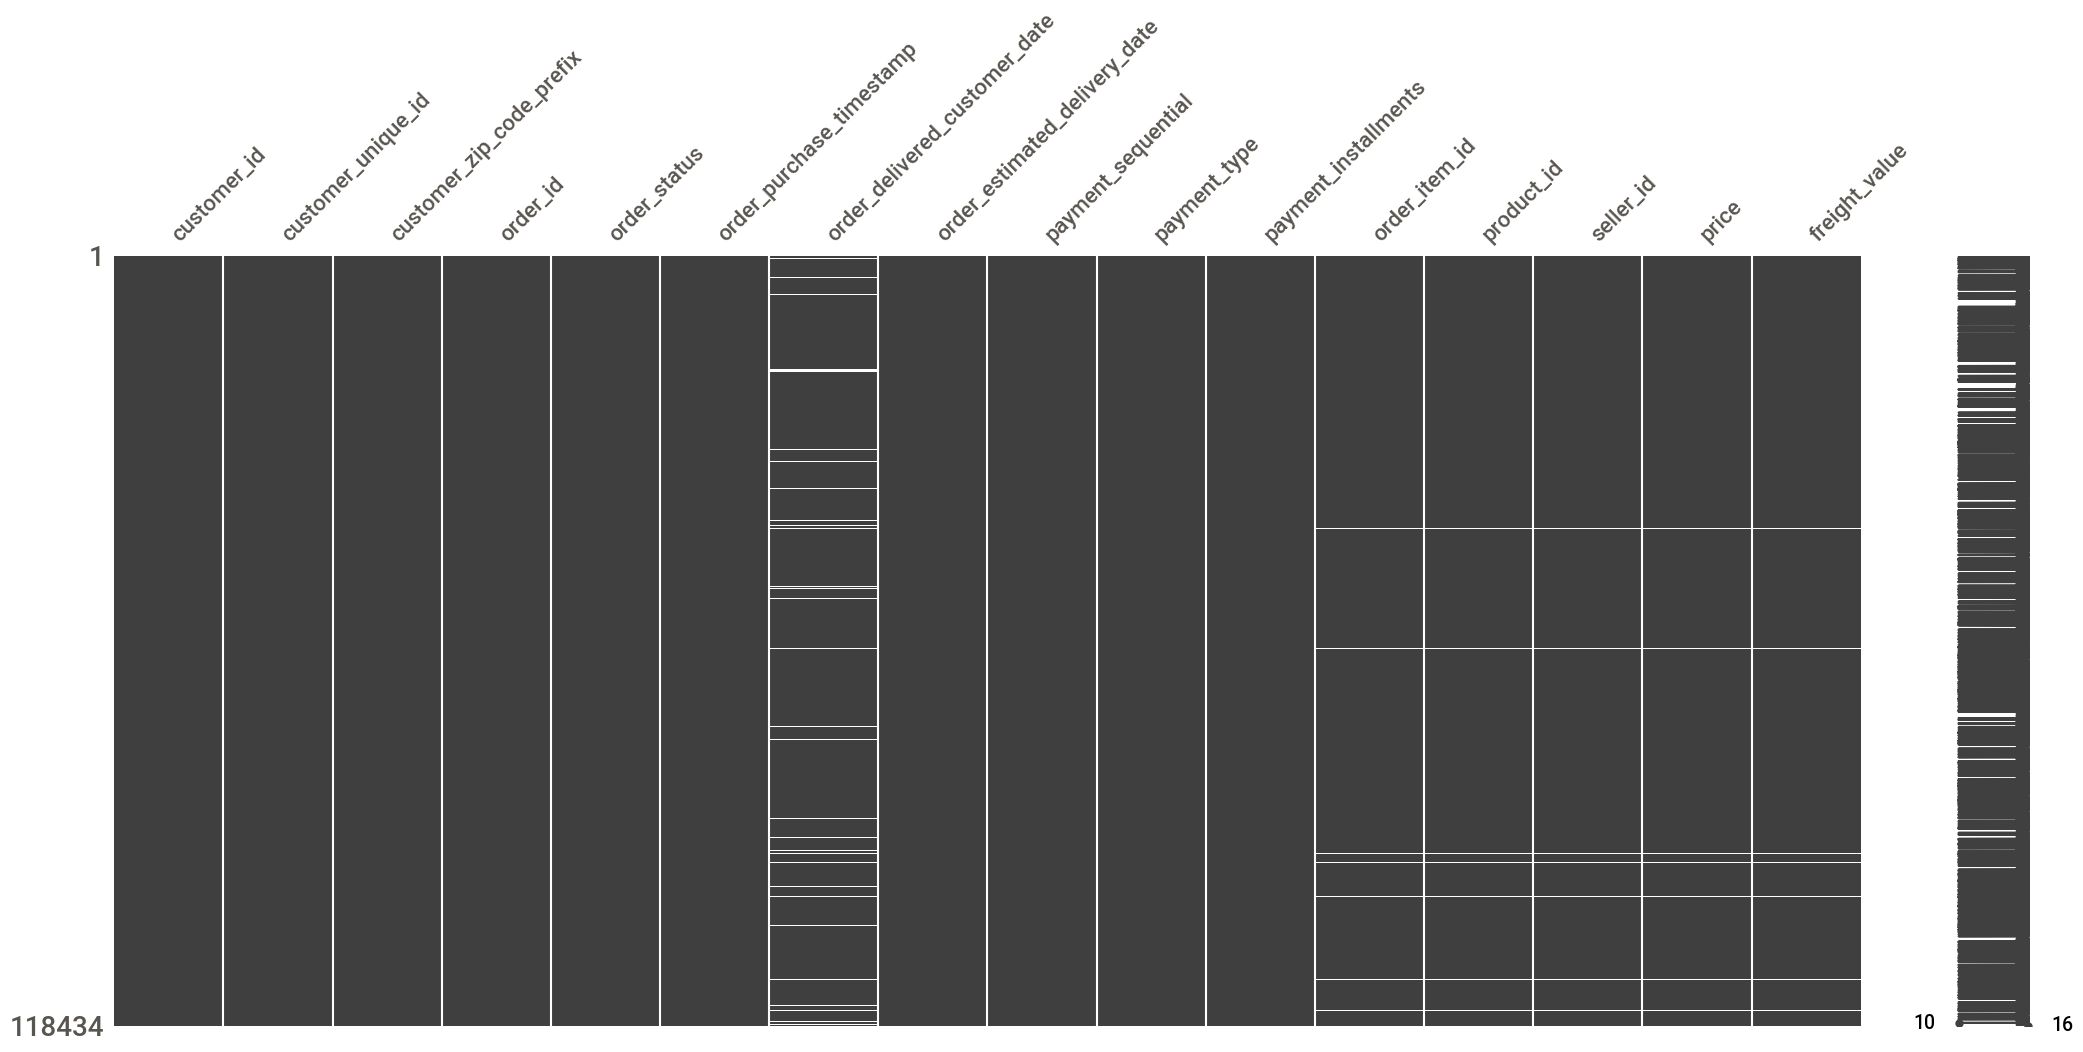

In [1282]:
msno.matrix(df_merged_final)

In [1283]:
df_merged_final = pd.merge(df_merged_final, df_order_reviews, left_on='order_id', right_on='order_id', how='left')

In [1284]:
df_merged_final.shape

(119143, 19)

<AxesSubplot:>

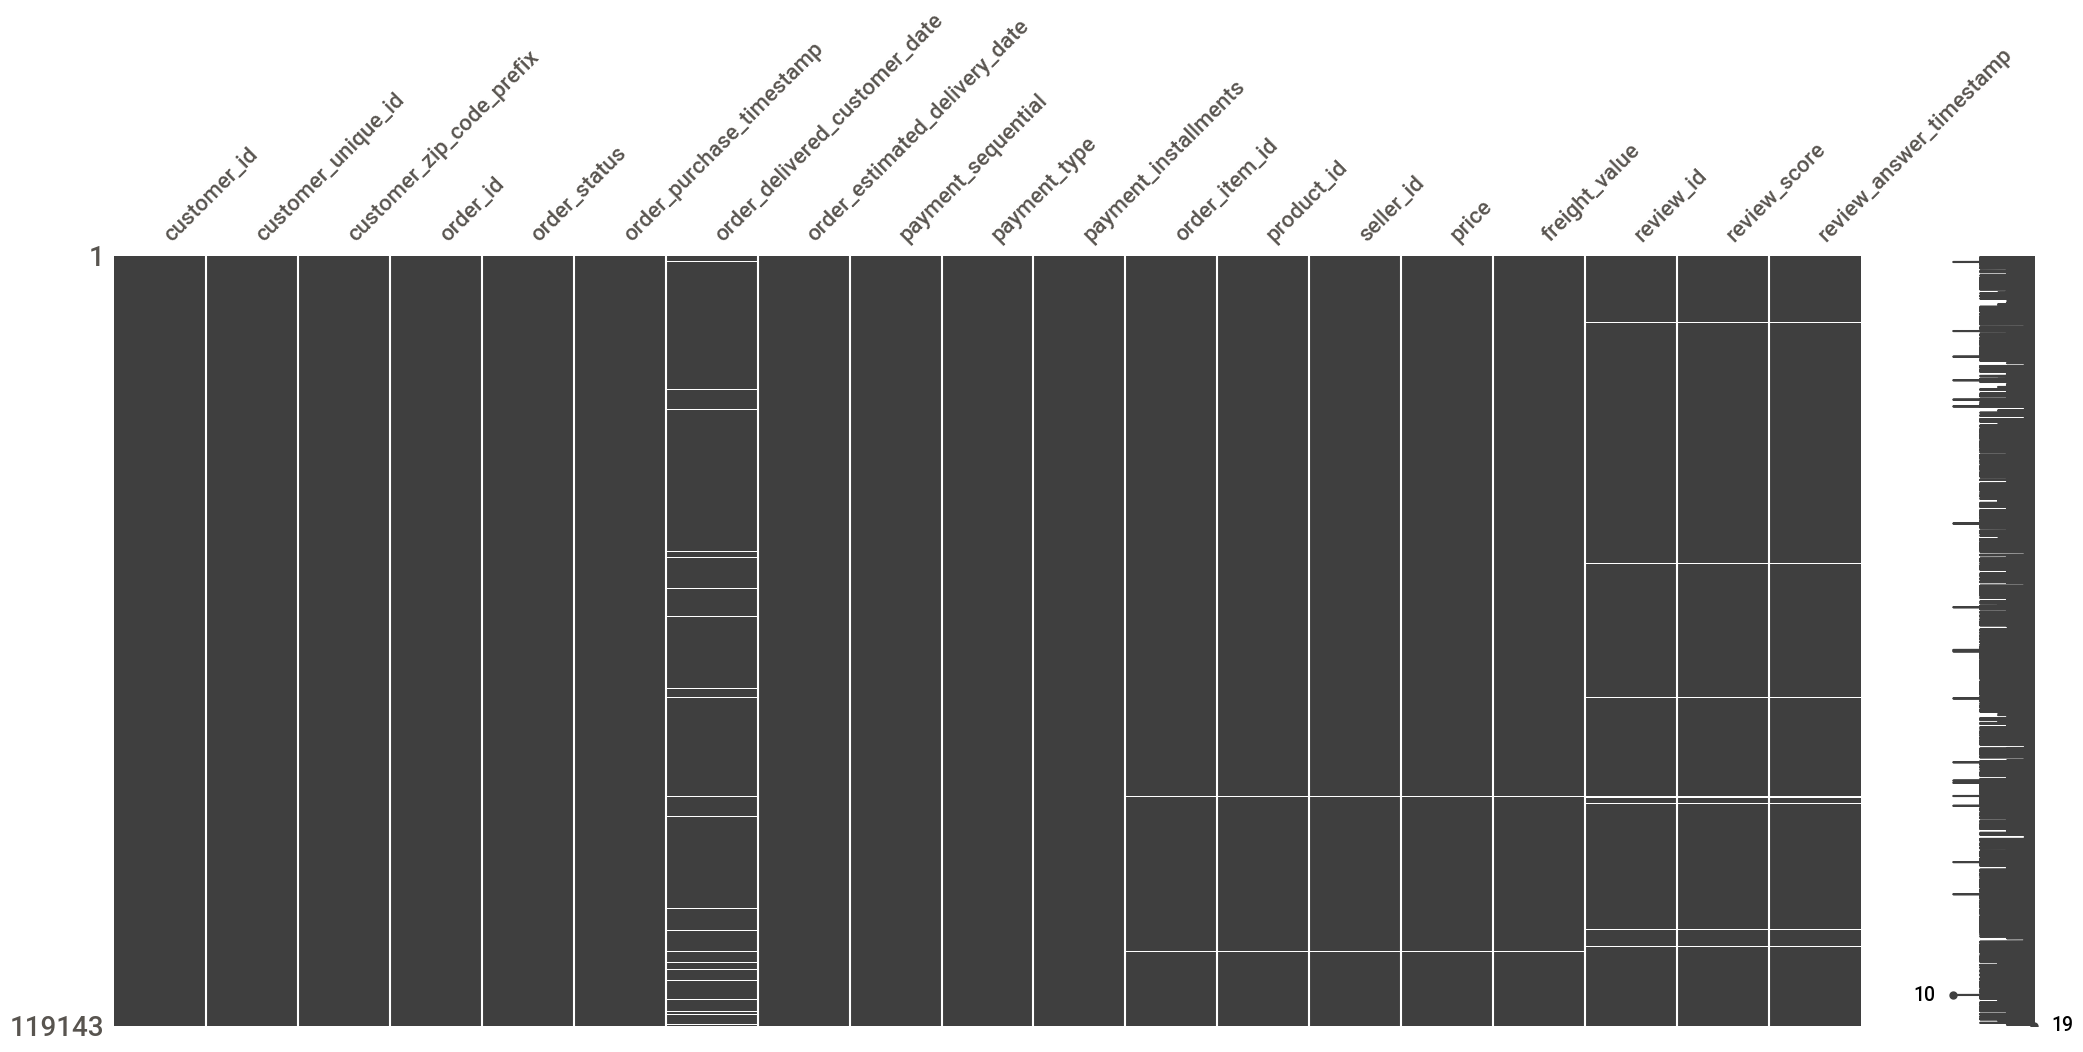

In [1285]:
msno.matrix(df_merged_final)

In [1302]:
df_merged_final = pd.merge(df_merged_final, df_order_products, left_on='product_id', right_on='product_id', how='left')

KeyError: 'product_id'

In [1287]:
df_merged_final.shape

(119143, 20)

<AxesSubplot:>

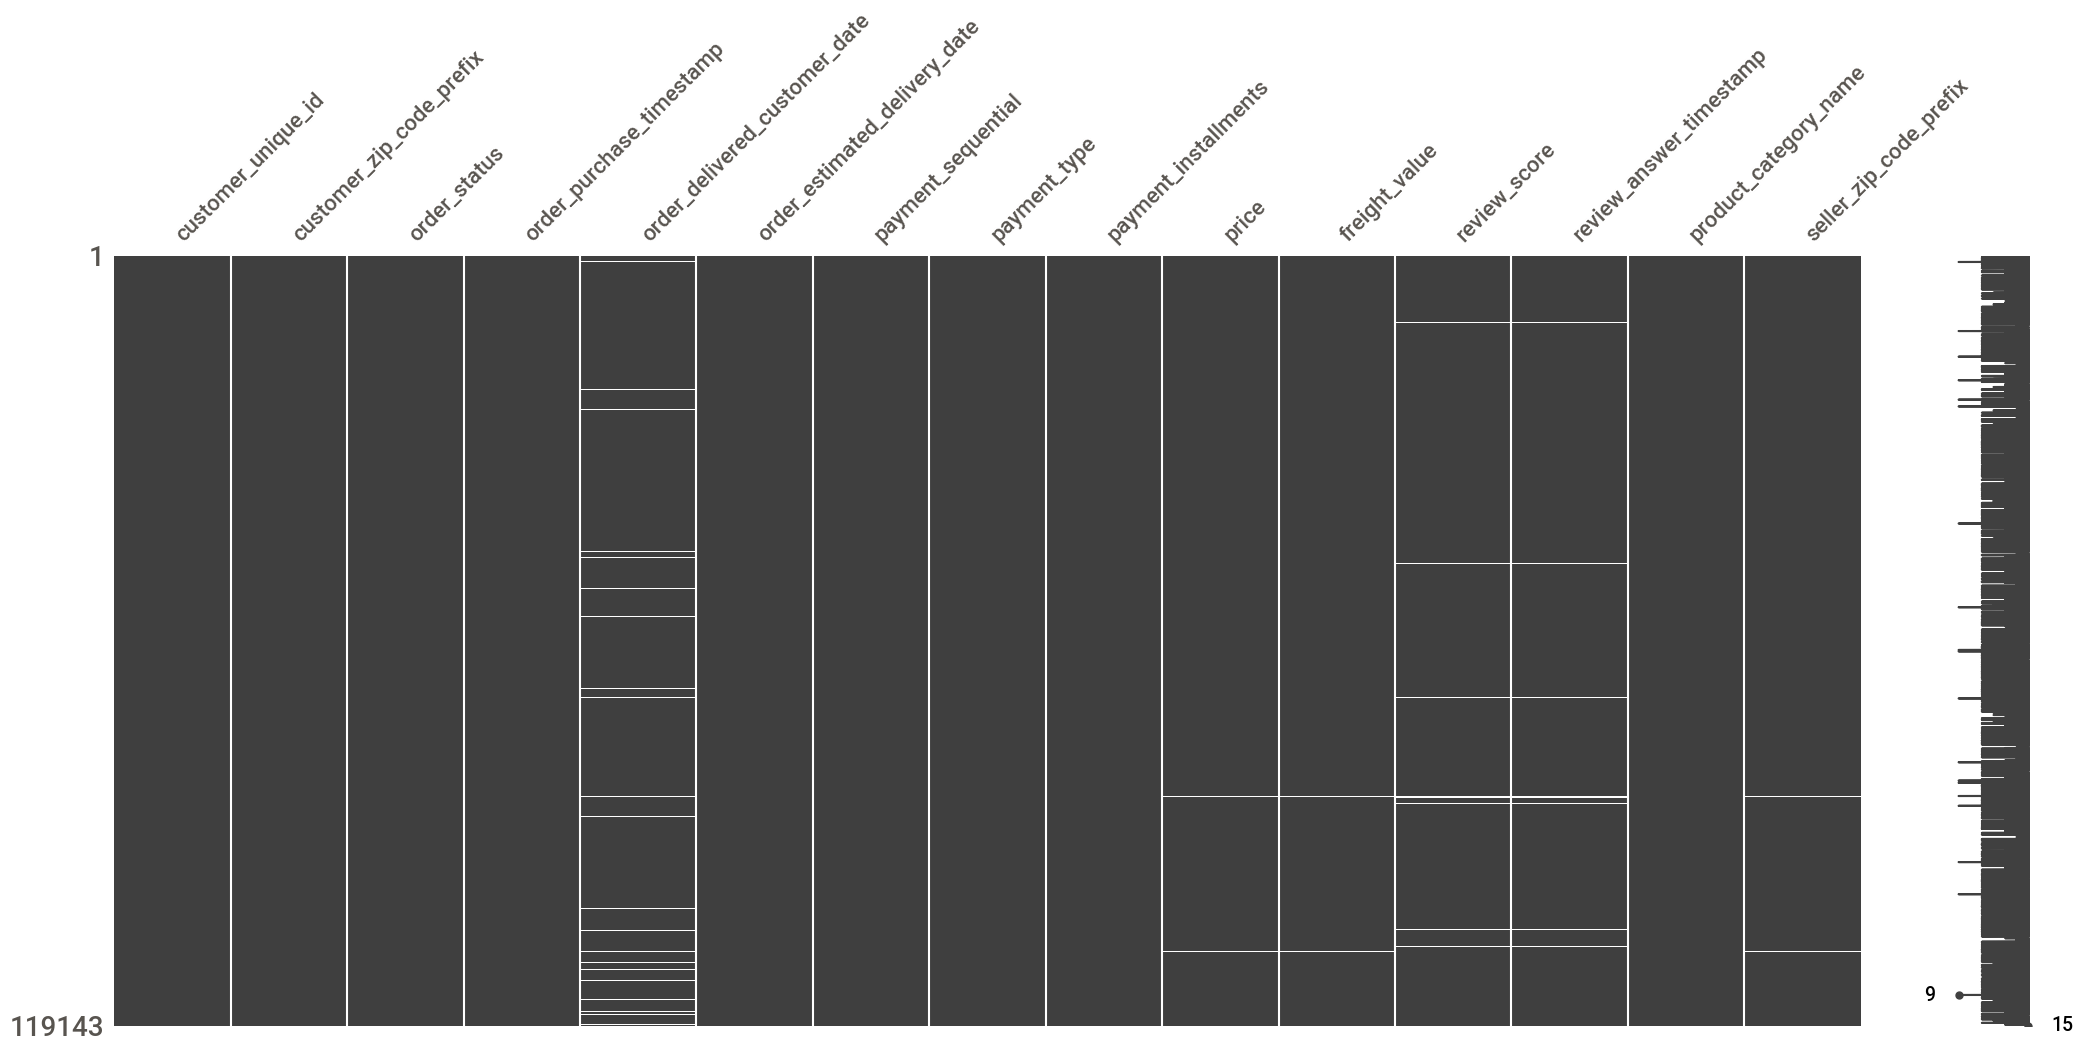

In [1303]:
msno.matrix(df_merged_final)

In [1289]:
df_merged_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'review_id', 'review_score', 'review_answer_timestamp',
       'product_category_name'],
      dtype='object')

In [1290]:
df_merged_final = pd.merge(df_merged_final, df_sellers, left_on='seller_id', right_on='seller_id', how='left')

In [1291]:
df_merged_final.shape

(119143, 23)

<AxesSubplot:>

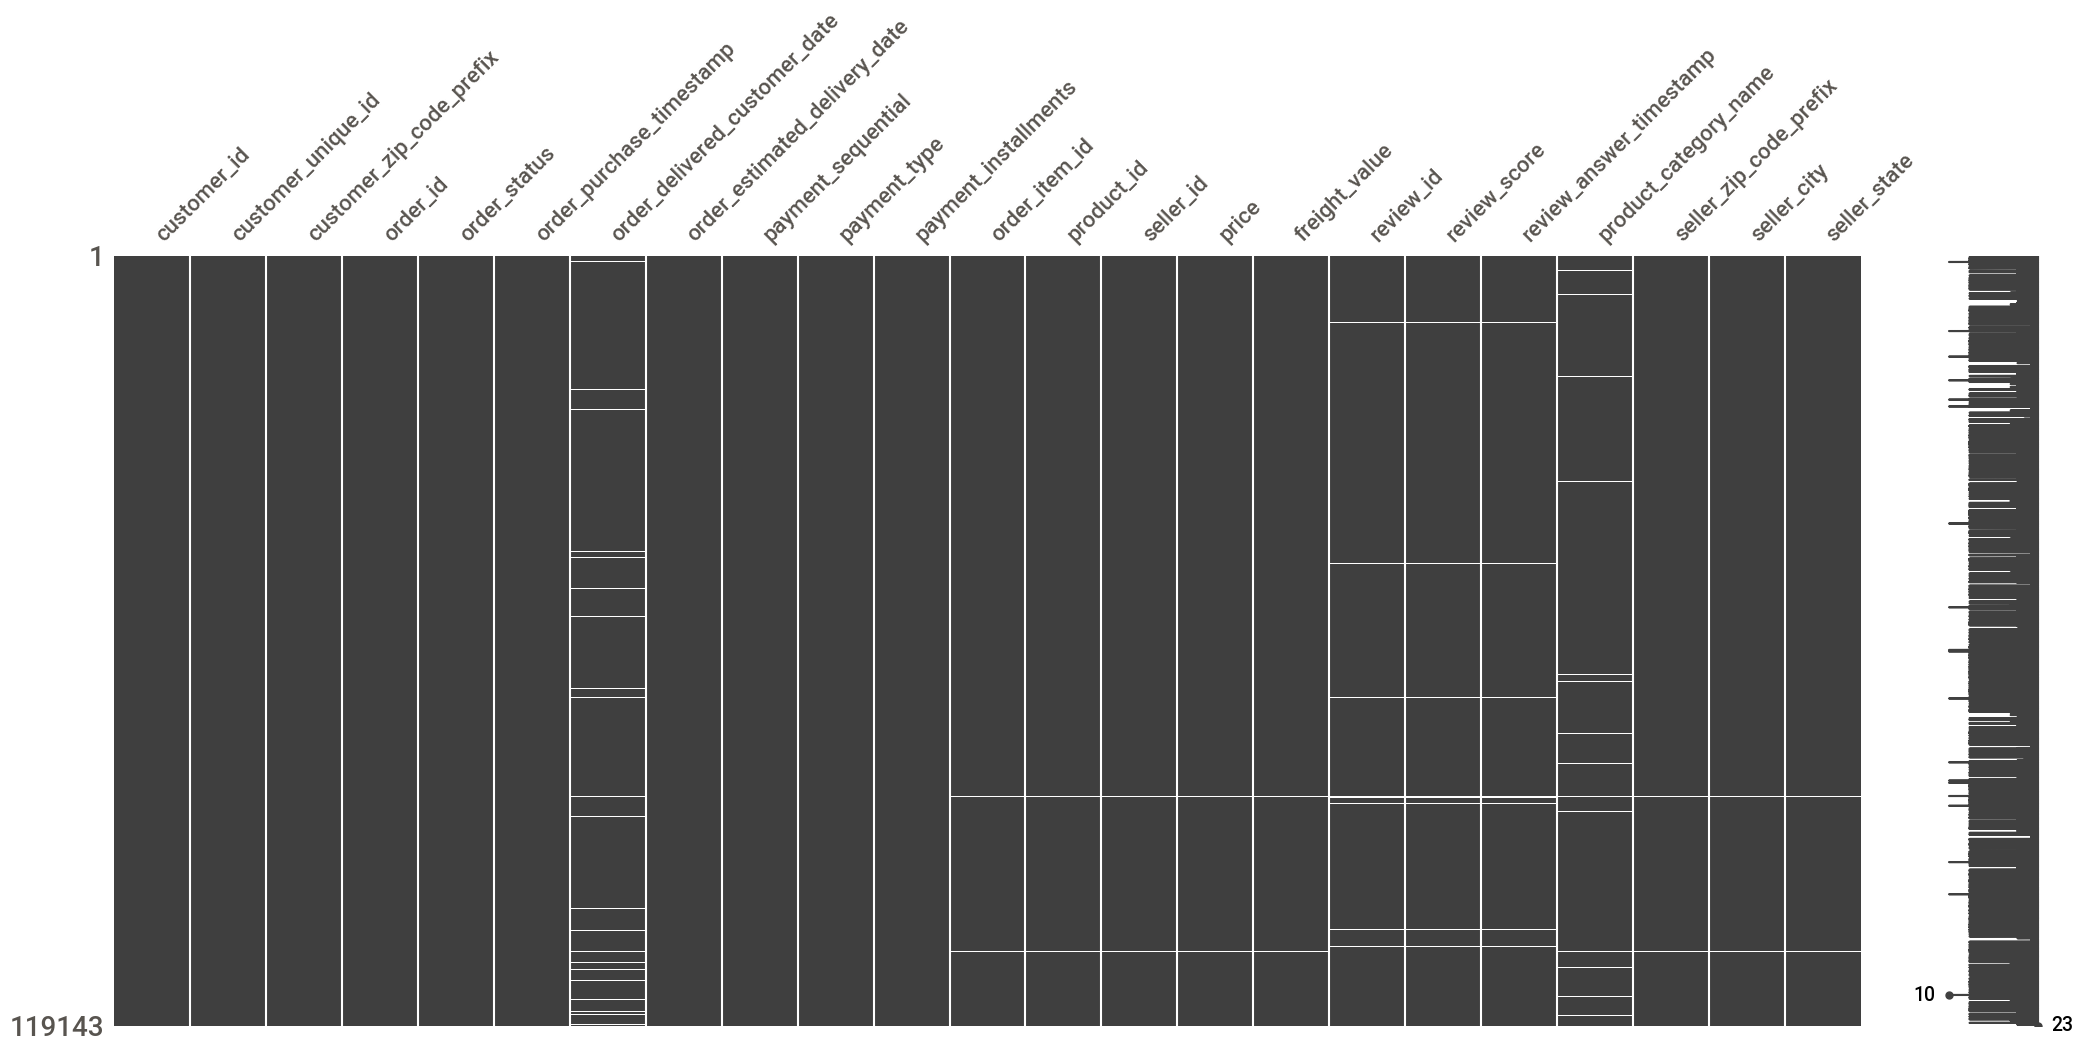

In [1292]:
msno.matrix(df_merged_final)

In [1293]:
df_merged_final["order_status"].value_counts()


delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

In [1294]:
columns_to_drop = ['customer_id',"review_id",'seller_city',"seller_state","seller_id","order_id",'order_item_id','product_id']
df_merged_final = df_merged_final.drop(columns=columns_to_drop)

In [1295]:
df_merged_final["product_category_name"].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

In [1296]:
# Create the mapping dictionary
mapping = {
    'office_furniture': 'furniture',
    'housewares': 'home_goods',
    'home_confort': 'home_goods',
    'furniture_decor': 'furniture',
    'garden_tools': 'home_goods',
    'bed_bath_table': 'home_goods',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'construction_tools_lights': 'construction_tools',
    'cool_stuff': 'misc',
    'home_construction': 'construction_tools',
    'costruction_tools_tools': 'construction_tools',
    'construction_tools_construction': 'construction_tools',
    'costruction_tools_garden': 'construction_tools',
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'christmas_supplies': 'holiday_goods',
    'agro_industry_and_commerce': 'industry_commerce',
    'industry_commerce_and_business': 'industry_commerce',
    'music': 'entertainment',
    'cds_dvds_musicals': 'entertainment',
    'dvds_blu_ray': 'entertainment',
    'cine_photo': 'electronics',
    'party_supplies': 'misc',
    'arts_and_craftmanship': 'crafts',
    'diapers_and_hygiene': 'baby_goods',
    'flowers': 'misc',
    'la_cuisine': 'kitchen_goods',
}

# Use the mapping dictionary to group similar categories
df_merged_final['product_category_name'] = df_merged_final['product_category_name'].map(mapping)

# Fill in any remaining NaN values with 'other'
df_merged_final['product_category_name'].fillna('other', inplace=True)

# View the unique categories
print(df_merged_final['product_category_name'].unique())


['furniture' 'home_goods' 'other' 'construction_tools' 'misc'
 'entertainment' 'industry_commerce' 'holiday_goods' 'kitchen_goods'
 'baby_goods' 'electronics' 'crafts']


In [1304]:
df_merged_final.shape

(119143, 15)

In [1298]:
report = sv.analyze(df_merged_final)
report.show_html('report_final.html')

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: customer_unique_id                  |▋         | [  6%]   00:00 -> (00:04 left)/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: custome

Report report_final.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1299]:
df_merged_final.columns

Index(['customer_unique_id', 'customer_zip_code_prefix', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'price', 'freight_value', 'review_score',
       'review_answer_timestamp', 'product_category_name',
       'seller_zip_code_prefix'],
      dtype='object')

In [1300]:
df_grouped = df_merged_final.groupby("customer_unique_id")
